## Импортирование и установка необходимых библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install category_encoders -q

In [ ]:
!pip install catboost -q

In [ ]:
import category_encoders as ce
import catboost as ctb
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
!pip install boruta -q

In [ ]:
import boruta

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

# Описание набора данных

Возьмем данные с соревнования на Kaggle - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques). 

Данный датасет, Ames Housing составленый Дином Де Коком, содержит 79 независимых переменных и 1 целевая(SalePrice), описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

Далее будем пользоваться только тренировочным набором данных train.csv. Описание признаков взято из сопровождающего файла data_description.txt


 Признак   | описание
-------------------|--------------------
MSSubClass       | Identifies the type of dwelling involved in the sale.
MSZoning       | Identifies the general zoning classification of the sale.
LotFrontage       | Linear feet of street connected to property
LotArea       | Lot size in square feet
Street       | Type of road access to property
Alley       | Type of alley access to property
LotShape       | General shape of property
LandContour       | Flatness of the property
Utilities       | Type of utilities available
LotConfig       | Lot configuration
LandSlope       | Slope of property
Neighborhood       | Physical locations within Ames city limits
Condition1       | Proximity to various conditions
Condition2       | Proximity to various conditions (if more than one is present)
BldgType       | Type of dwelling
HouseStyle       | Lot size in square feet
OverallQual       | Rates the overall material and finish of the house
OverallCond       | Rates the overall condition of the house
YearBuilt       | Original construction date
YearRemodAdd       | Remodel date (same as construction date if no remodeling or additions)
RoofStyle       | Type of roof
RoofMatl       | Roof material
Exterior1st       | Exterior covering on house
Exterior2nd       | Exterior covering on house (if more than one material)
MasVnrType       | Masonry veneer type
MasVnrArea       | Masonry veneer area in square feet
ExterQual       | Evaluates the quality of the material on the exterior
ExterCond       | Evaluates the present condition of the material on the exterior
Foundation       | Type of foundation
BsmtQual       | Evaluates the height of the basement
BsmtCond       | Evaluates the general condition of the basement
BsmtExposure       | Refers to walkout or garden level walls
BsmtFinType1       | Rating of basement finished area
BsmtFinSF1       | Type 1 finished square feet
BsmtFinType2       | Rating of basement finished area (if multiple types)
BsmtFinSF2       | Type 2 finished square feet
BsmtUnfSF       | Unfinished square feet of basement area
TotalBsmtSF       | Total square feet of basement area
Heating       | Type of heating
HeatingQC       | Heating quality and condition
CentralAir       | Central air conditioning
Electrical       | Electrical system
1stFlrSF       | First Floor square feet
2ndFlrSF       | Second floor square feet
LowQualFinSF       | Low quality finished square feet (all floors)
GrLivArea       | Above grade (ground) living area square feet
BsmtFullBath       | Basement full bathrooms
BsmtHalfBath       | Basement half bathrooms
FullBath       | Full bathrooms above grade
HalfBath       | Half baths above grade
Bedroom       | Bedrooms above grade (does NOT include basement bedrooms)
Kitchen       | Kitchens above grade
KitchenQual       | Kitchen quality
TotRmsAbvGrd       | Total rooms above grade (does not include bathrooms)
Functional       | Home functionality (Assume typical unless deductions are warranted)
Fireplaces       | Number of fireplaces
FireplaceQu       | Fireplace quality
GarageType       | Garage location
GarageYrBlt       | Year garage was built
GarageFinish       | Interior finish of the garage
GarageCars       | Size of garage in car capacity
GarageArea       | Size of garage in square feet
GarageQual       | Garage quality
GarageCond       | Garage condition
PavedDrive       | Paved driveway
WoodDeckSF       | Wood deck area in square feet
OpenPorchSF       | Open porch area in square feet
EnclosedPorch       | Enclosed porch area in square feet
3SsnPorch       | Three season porch area in square feet
ScreenPorch       | Screen porch area in square feet
PoolArea       | Pool area in square feet
PoolQC       | Pool quality
Fence       | Fence quality
MiscFeature       | Miscellaneous feature not covered in other categories
MiscVal       | $Value of miscellaneous feature
MoSold       | Month Sold (MM)
YrSold       | Year Sold (YYYY)
SaleType       | Type of sale
SaleCondition       | Condition of sale

## Загрузка и предварительная обработка данных

In [4]:
train_data_path = 'data/train.csv'
train = pd.read_csv(train_data_path, index_col='Id')
train_eda = pd.read_csv(train_data_path, index_col='Id')

In [5]:
train_eda.shape

(1460, 80)

In [ ]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Выведем названия признаков

In [ ]:
print(train.columns.to_list())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

Типы данных признаков

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Выведем основные статистики по набору данных

In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Очистка данных
Выведем количество пропущенных значений по признакам в процентах от общего количества

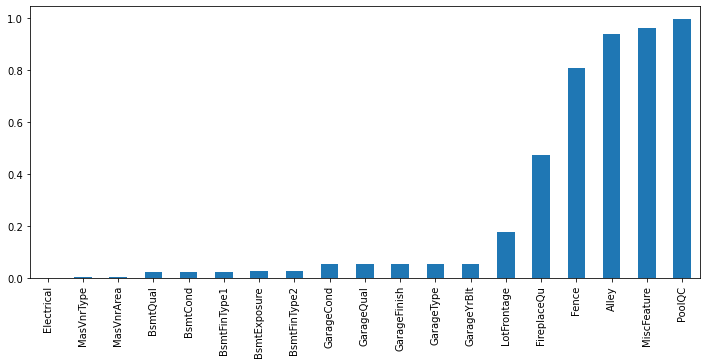

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]
miss_percent = missing / train.shape[0]

miss_percent.sort_values(inplace=True)
miss_percent.plot.bar(figsize=(12, 5));


Выведем проценты пропусков в признаках в виде отсортированного столбца значений. В отдельный список добавим те признаки, где процент пропусков более 50%

In [ ]:
drop_cat = missing[missing/train.shape[0] > 0.5].index.to_list()
missing.sort_values(ascending=False)/train.shape[0] * 100 

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

 Можно выделить следующие основные стратегии замены пропущенных данных подстановочными значениями:
 *  замена средним/медианой
 *  замена частым значением(модой)/константой
 *  замена с помощью метода ближайших KNN
 *  замена данных с помощью глубоко обучения. Библиотека datawig от AWS позволяет восстанавливать недостающие значения за счет тренировки нейронной сети на тех точках, для которых есть все параметры.
 
Просмотрим данные и произведем замену средним/медианой или модой/константой.

Посмотрим на категории в признаках с более 50% пропущеных значений

In [ ]:
for i in drop_cat:
    print(train_eda[i].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


Так как пропущено более 80% значений, а в признаках Fence и PoolQC еще и явное преобладание одной категории над другими,
то удалим их из датасета.

In [ ]:
train_eda.drop(columns=drop_cat, axis=1, inplace=True)

Посмотрим более подробно на остальные признаки с пропущенными значениями

## Замена пропусков(пример для категориального признака)

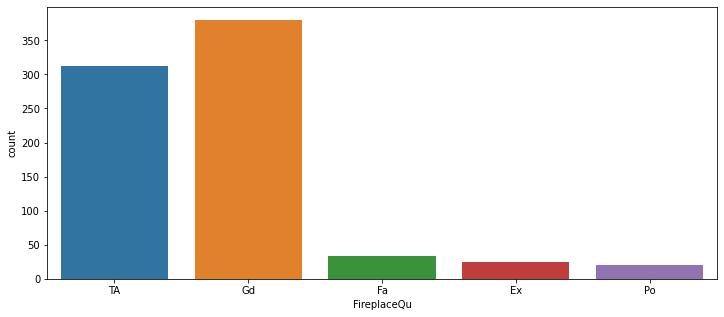

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(train_eda["FireplaceQu"]);

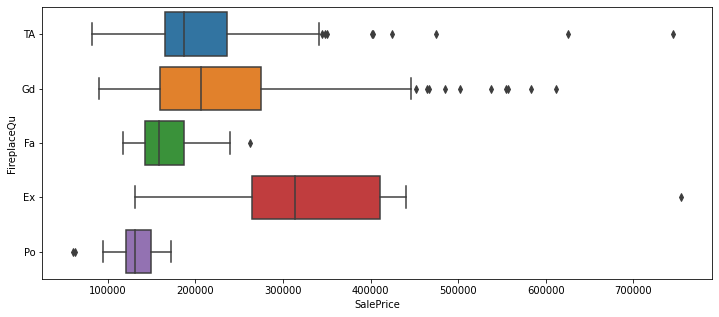

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="FireplaceQu");

Заменим пропущенные значения данного признака значением NoFire согласно описанию категории из прилагаемого файла. Несмотря на то, что boxplot показывает наличие выбросов, делать с ними ничего не будем.

In [ ]:
train_eda["FireplaceQu"] = train_eda["FireplaceQu"].fillna("NoFire")

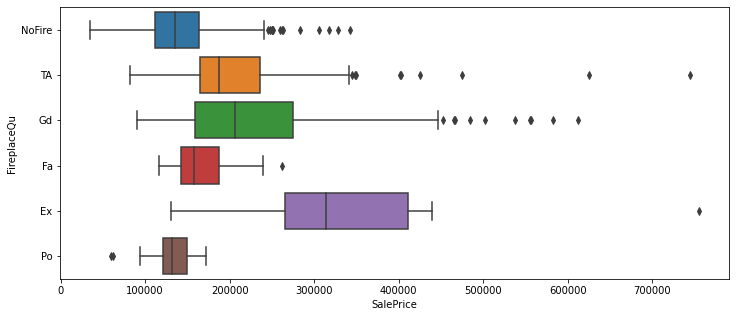

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="FireplaceQu");

Выведем гистограмму признака LotFrontage

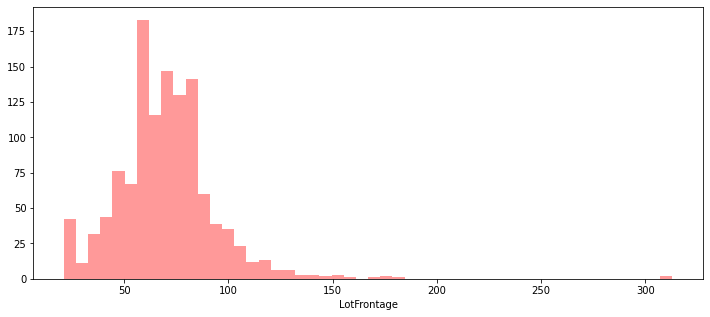

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.LotFrontage, kde=False, color="red");

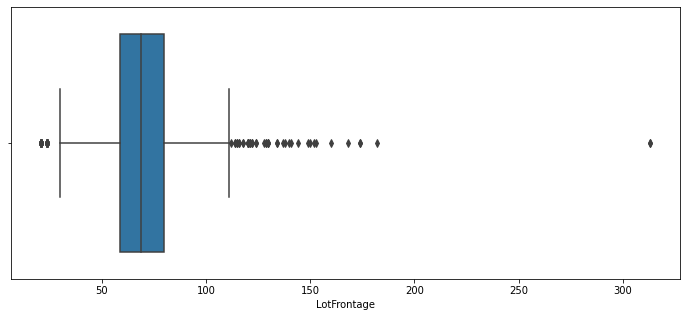

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="LotFrontage");

In [ ]:
print("LotFrontage")
print(f"Mean value : {train.LotFrontage.mean()}")
print(f"Median value : {train.LotFrontage.median()}")

LotFrontage
Mean value : 70.04995836802665
Median value : 69.0


Так как небольшая разница между средним и медианой, а также есть выбросы, лучше заполним медианой, как более устойчивой к ним.

In [ ]:
train_eda["LotFrontage"] = train_eda["LotFrontage"].fillna(train_eda["LotFrontage"].median())

Категориальный признак GarageFinish

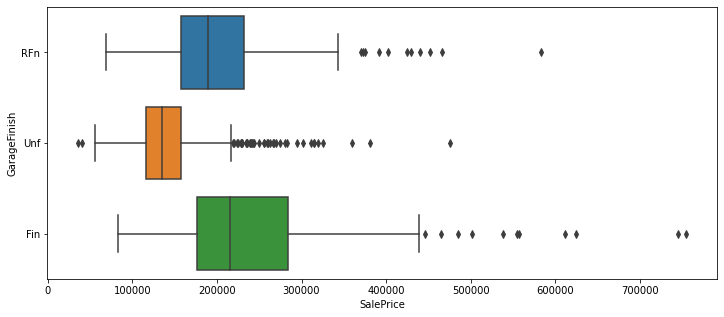

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="GarageFinish");

Из описания NA это No Garage, поэтому заполним этим значением

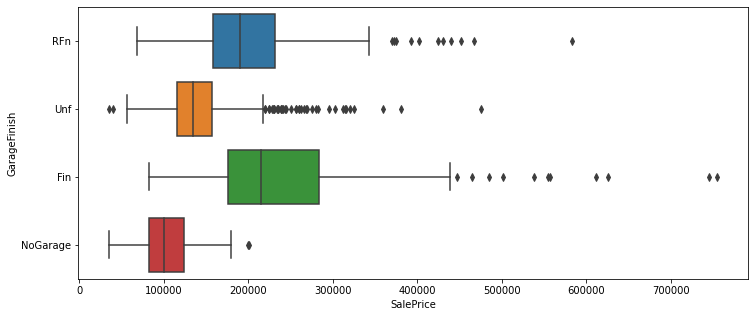

In [ ]:
plt.figure(figsize=(12, 5))
train_eda["GarageFinish"] = train_eda["GarageFinish"].fillna("NoGarage")
sns.boxplot(data=train_eda, x="SalePrice", y="GarageFinish");

Категориальный признак GarageCond

In [ ]:
train_eda.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Из описания этого признака: NA это No Garage, поэтому заполним этим значением и выведем boxplot полученного.

In [ ]:
train_eda["GarageCond"] = train_eda["GarageCond"].fillna("NoGarage")

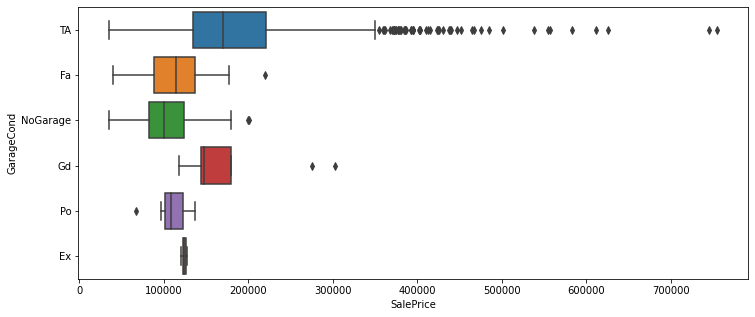

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="GarageCond")

## Замена пропусков(пример для числовой признак)

Числовой признак GarageYrBlt

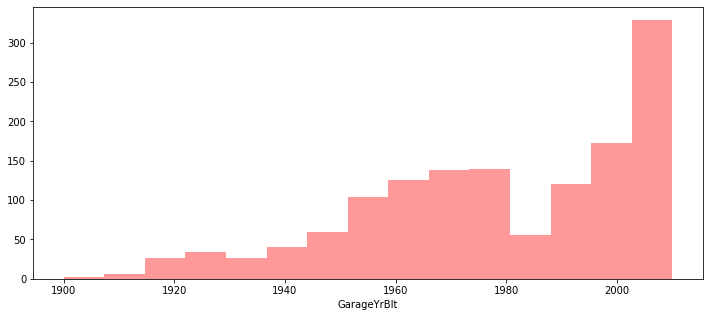

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.GarageYrBlt, kde=False, color="red")
train_eda["GarageYrBlt"] = train_eda["GarageYrBlt"].fillna(train_eda.GarageYrBlt.min())

Категориальный признак GarageType

Из описания NA это No Garage, поэтому заполним этим значением и выведем boxplot до и после заполнения пропущенных значений

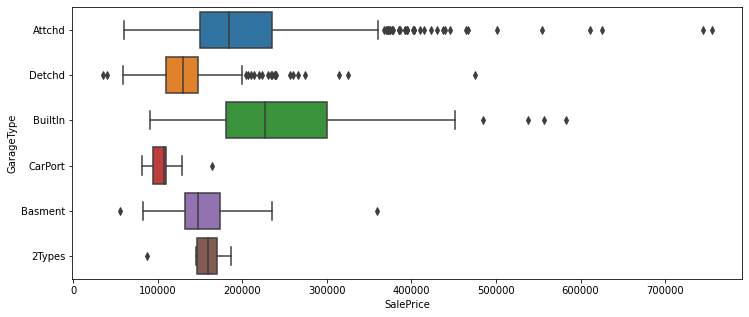

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="GarageType")
train_eda["GarageType"] = train_eda["GarageType"].fillna("NoGarage")

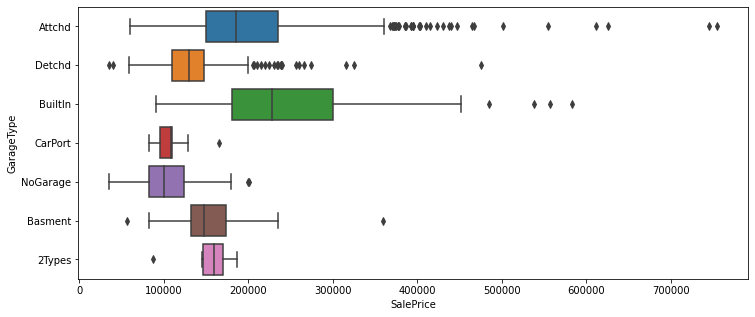

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="GarageType");

Категориальный признак BsmtQual

Из описания NA это No Basement, поэтому заполним значением NoBsmt

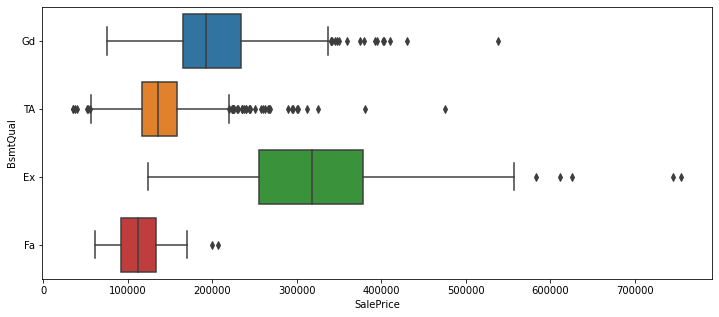

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="BsmtQual")
train_eda["BsmtQual"] = train_eda["BsmtQual"].fillna("NoBsmt")

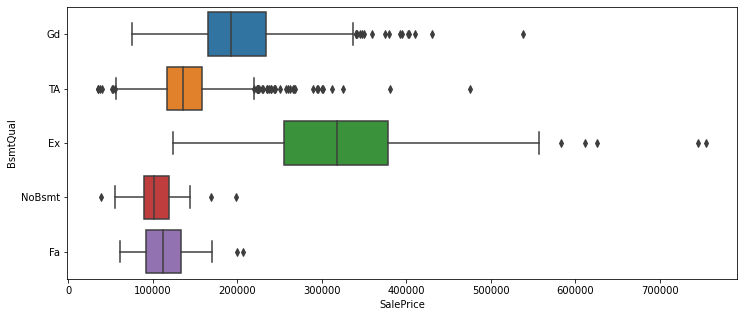

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="BsmtQual");

Категориальный признак BsmtCond

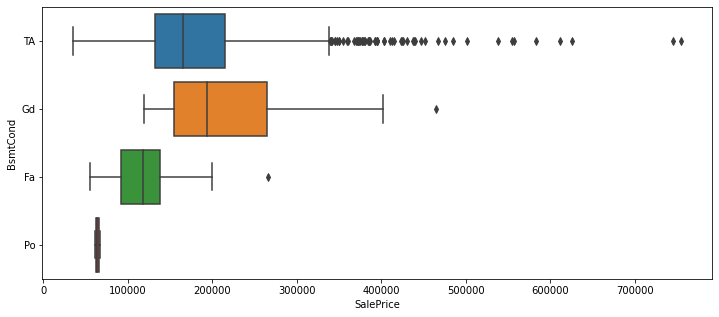

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="BsmtCond");

Заполним пропущенные значение самым частым значением(модой).

In [ ]:
train_eda["BsmtCond"] = train_eda["BsmtCond"].fillna(train_eda['BsmtCond'].mode())

Категориальный признак BsmtExposure

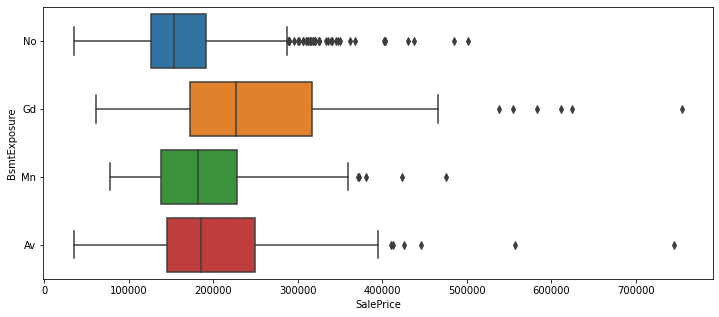

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="BsmtExposure");

Из описания NA это No Basement, поэтому заполним значением NoBsmt

In [ ]:
train_eda["BsmtExposure"] = train_eda["BsmtExposure"].fillna("NoBsmt")

Категориальный признак BsmtFinType1

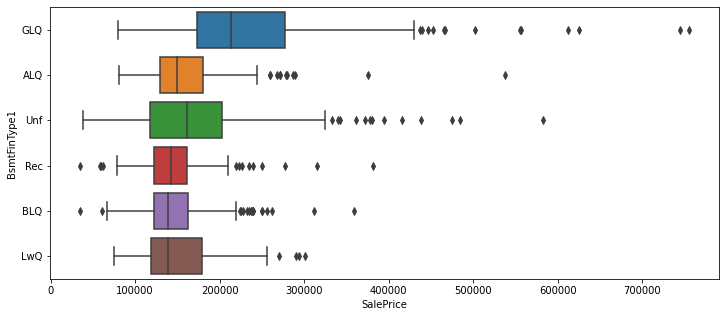

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train, x="SalePrice", y="BsmtFinType1");

Из описания NA это No Basement, поэтому заполним значением NoBsmt

In [ ]:
train_eda["BsmtFinType1"] = train_eda["BsmtFinType1"].fillna("NoBsmt")

Категориальный признак BsmtFinType2

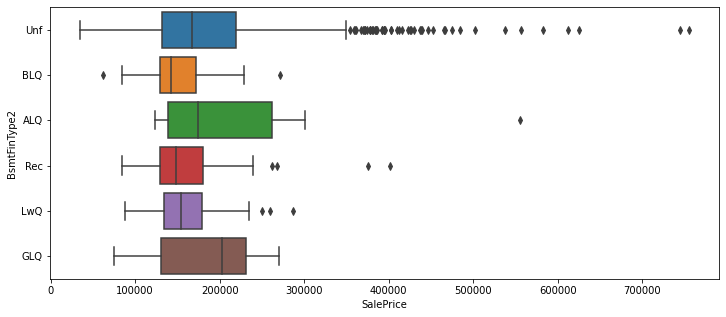

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train, x="SalePrice", y="BsmtFinType2");

Из описания NA это No Basement, поэтому заполним значением NoBsmt

In [ ]:
train_eda["BsmtFinType2"] = train_eda["BsmtFinType2"].fillna("NoBsmt")

Категориальный признак MasVnrType

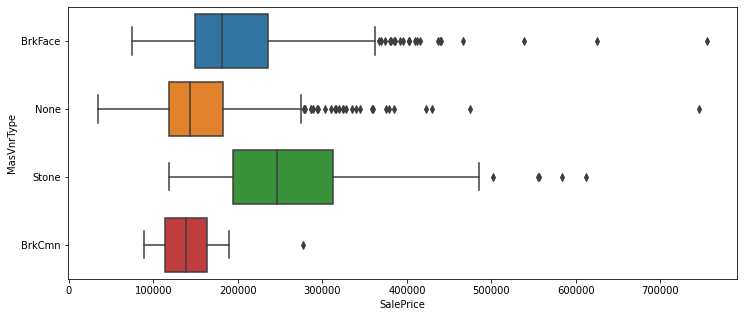

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train, x="SalePrice", y="MasVnrType");

Из описания NA это None, поэтому заполним значением 0

In [ ]:
train_eda["MasVnrType"] = train_eda["MasVnrType"].fillna(0)

Числовой признак MasVnrArea

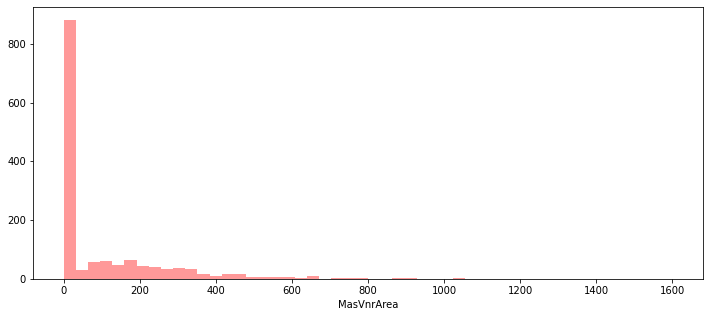

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.MasVnrArea, kde=False, color="red");

Заполним минимальным значением признака

In [ ]:
train_eda["MasVnrArea"] = train_eda["MasVnrArea"].fillna(train_eda.MasVnrArea.min())

Категориальный признак Electrical

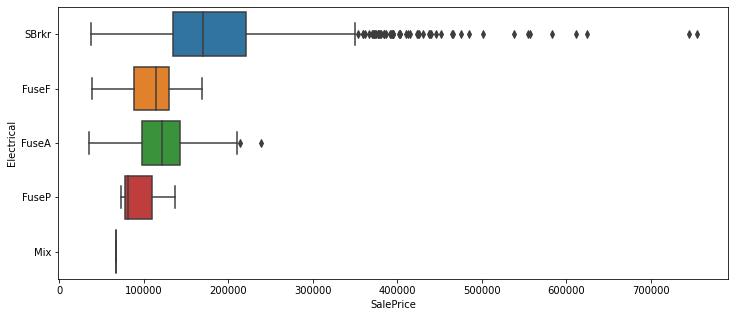

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="Electrical");

Заполним модой

In [ ]:
train_eda["Electrical"] = train_eda["Electrical"].fillna(train_eda["Electrical"].mode())

Категориальный признак MSZoning

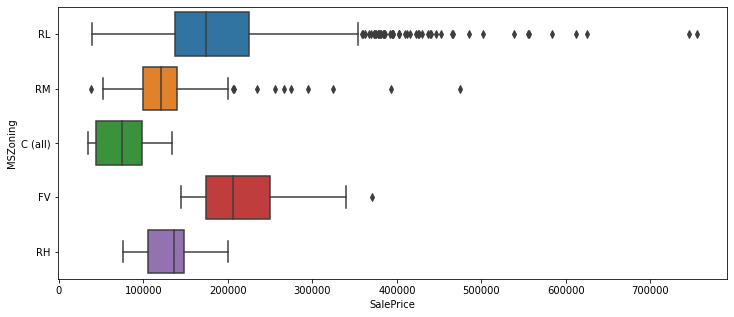

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="MSZoning");

Заполним модой

In [ ]:
train_eda["MSZoning"] = train_eda["MSZoning"].fillna(train_eda["MSZoning"].mode())

Категориальный признак Functional

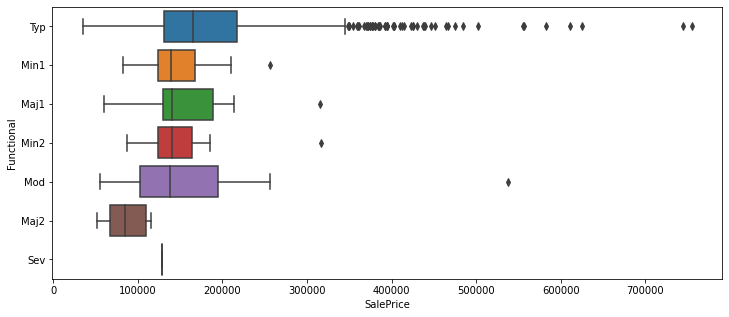

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="Functional");

Заполним модой

In [ ]:
train_eda["Functional"] = train_eda["Functional"].fillna(train_eda["Functional"].mode())

Категориальный признак BsmtFullBath

In [ ]:
train.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Заполним модой

In [ ]:
train_eda["BsmtFullBath"] =train_eda["BsmtFullBath"].fillna(0)

Категориальный признак Utilities

In [ ]:
train_eda.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Удалим этот признак, так как он почти полностью занят одним значением.

In [ ]:
train_eda.drop("Utilities", axis=1, inplace=True)

Категориальный признак SaleType

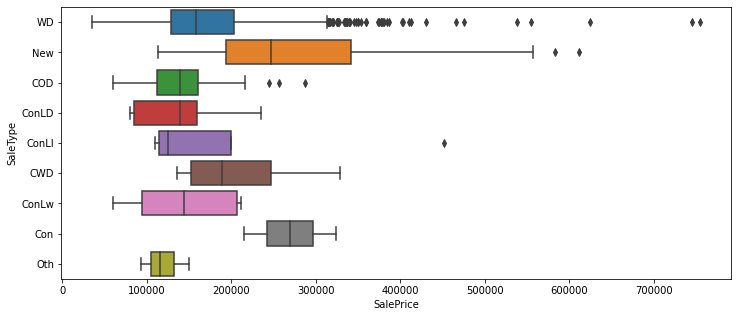

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=train_eda, x="SalePrice", y="SaleType");

Заполним модой

In [ ]:
train_eda["SaleType"] = train_eda["SaleType"].fillna(train_eda["SaleType"].mode())

Гистограмми числового признак GarageArea

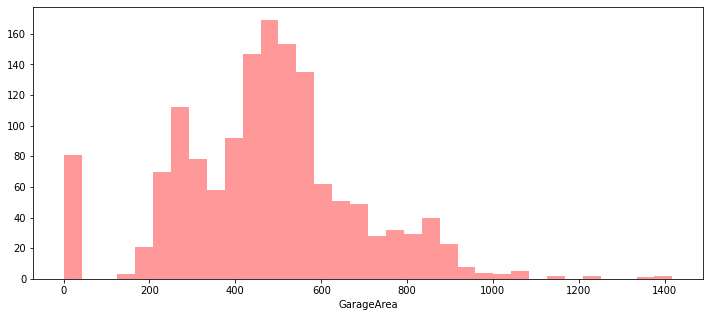

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.GarageArea, kde=False, color="red");

Заполним средним значением.

In [ ]:
train_eda["GarageArea"] = train_eda["GarageArea"].fillna(train_eda["GarageArea"].mean())

Порядковый признак GarageCars

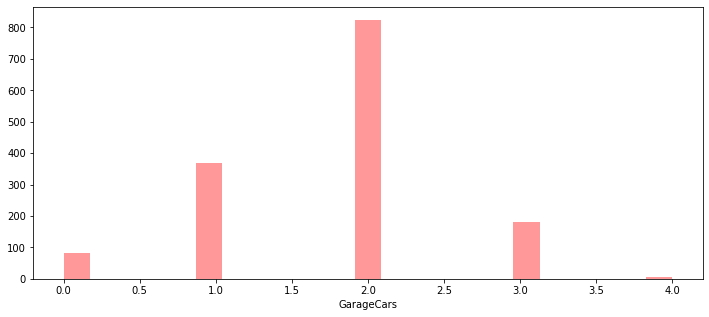

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.GarageCars, kde=False, color="red");

Заполним минимальным значением.

In [ ]:
train_eda["GarageArea"] =train_eda["GarageArea"].fillna(train_eda.GarageArea.min())

Категориальны признак KitchenQual

In [ ]:
train_eda.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Заполним модой

In [ ]:
train_eda["KitchenQual"] =train_eda["KitchenQual"].fillna(train_eda.KitchenQual.mode())

Гистограмма числового признака TotalBsmtSF

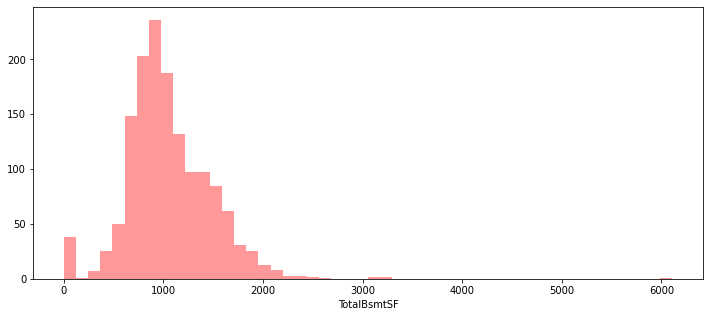

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(train_eda.TotalBsmtSF, kde=False, color="red");

Заполним средним значением

In [ ]:
train_eda["TotalBsmtSF"] =train_eda["TotalBsmtSF"].fillna(train_eda.TotalBsmtSF.mean())

Числовые признаки BsmtFinSF1, BsmtFinSF2, BsmtUnfSF2

In [ ]:
train_eda["BsmtFinSF2"].value_counts()

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [ ]:
train_eda["BsmtFinSF1"].value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [ ]:
train_eda["BsmtUnfSF"].value_counts()


0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64

Заполним BsmtFinSF1, BsmtFinSF2, BsmtUnfSF минимальным значением

In [ ]:
train_eda["BsmtFinSF1"] =train_eda["BsmtFinSF1"].fillna(train_eda.BsmtFinSF1.min())
train_eda["BsmtFinSF2"] =train_eda["BsmtFinSF2"].fillna(train_eda.BsmtFinSF2.min())
train_eda["BsmtUnfSF"] =train_eda["BsmtUnfSF"].fillna(train_eda.BsmtUnfSF.min())

Категориальные признаки Exterior1st, Exterior1nd

In [ ]:
train_eda["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
train_eda["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Заполним Exterior1st, Exterior2nd модой

In [ ]:
train_eda["Exterior1st"] =train_eda["Exterior1st"].fillna(train_eda.Exterior1st.mode())
train_eda["Exterior2nd"] =train_eda["Exterior2nd"].fillna(train_eda.Exterior2nd.mode())

Категориальный признак GarageQual

In [ ]:
train_eda["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

Заполним модой

In [ ]:
train_eda["GarageQual"] =train_eda["GarageQual"].fillna(train_eda.GarageQual.mode())

Категориальный признак BsmtCond

In [ ]:
train_eda["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Заполним модой

In [ ]:
train_eda["BsmtCond"] =train_eda["BsmtCond"].fillna(train_eda.BsmtCond.mode())

Категориальный признак Electrical

In [ ]:
train_eda["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Заполним модой

In [ ]:
train_eda["Electrical"] =train_eda["Electrical"].fillna(train_eda.Electrical.mode())

Полученные данные повторно проверим на пропуски

In [ ]:
train_eda.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## Разделение данных, масштабирование

Отделяем целевой признак от данных

In [ ]:
target_train = train_eda["SalePrice"]
data_train = train_eda.drop(columns = "SalePrice")

Создаем список категориальных и численных признаков

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = []
numerical = []
for i in data_train.columns:
    if data_train[i].dtype not in numeric_dtypes:
        categorical.append(i)
    else:
        numerical.append(i)


In [ ]:
data_train[categorical].tail(3)

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1458,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1459,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Gd,Typ,NoFire,Attchd,Unf,TA,TA,Y,WD,Normal
1460,RL,Pave,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,TA,Typ,NoFire,Attchd,Fin,TA,TA,Y,WD,Normal


In [ ]:
features = categorical + numerical

Выведем гистограммы всех численных признаков

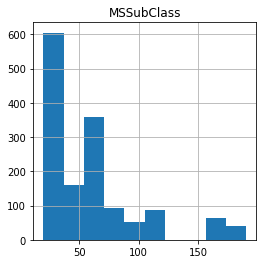

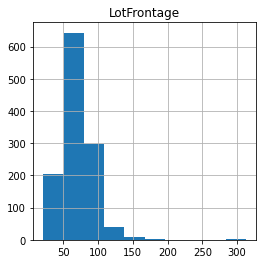

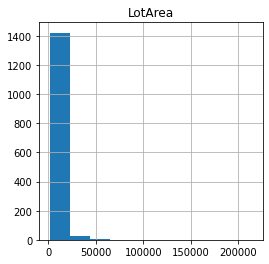

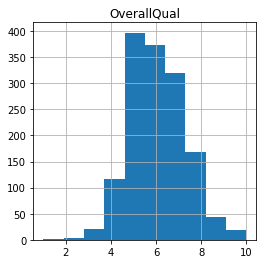

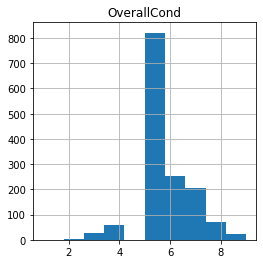

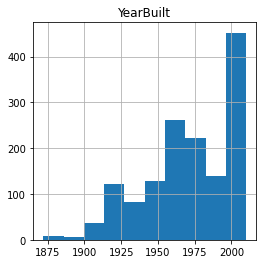

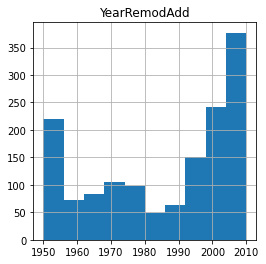

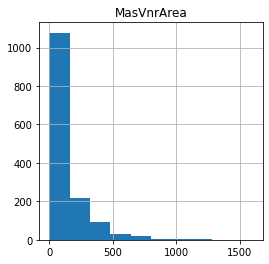

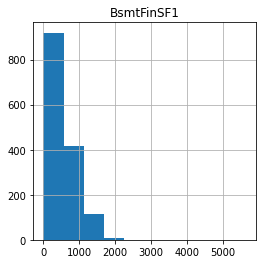

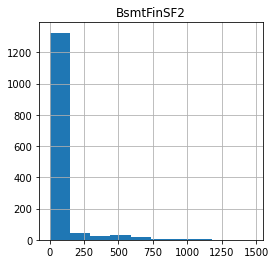

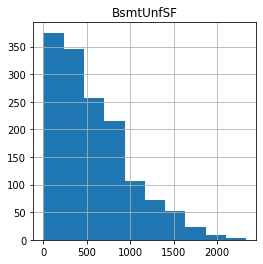

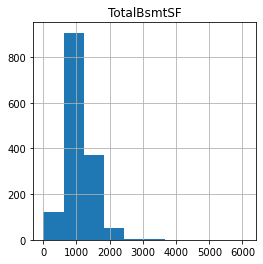

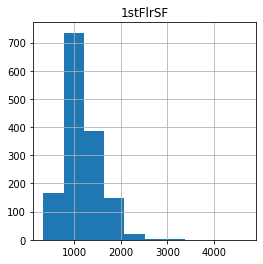

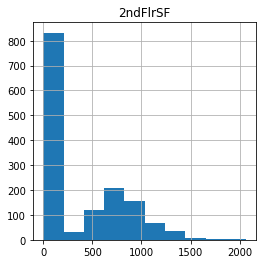

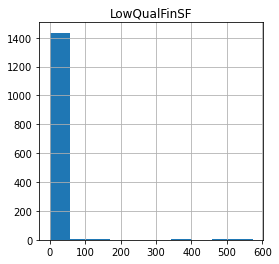

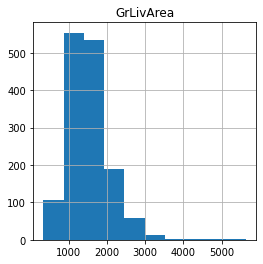

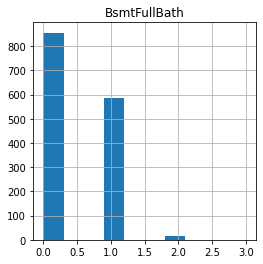

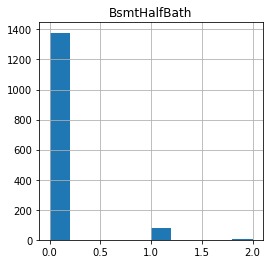

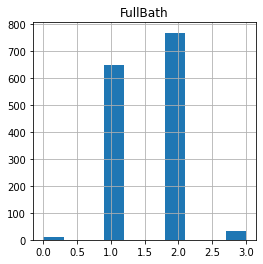

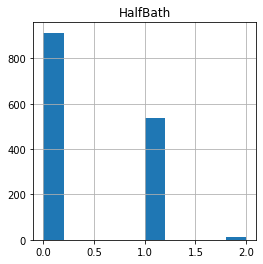

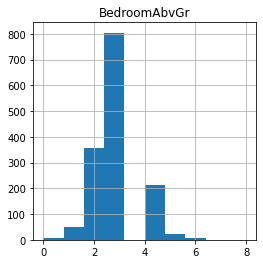

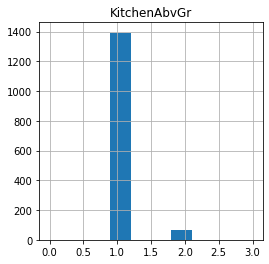

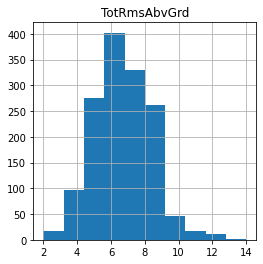

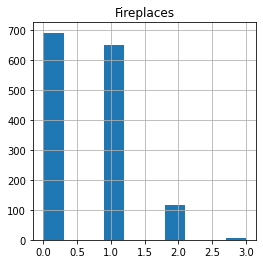

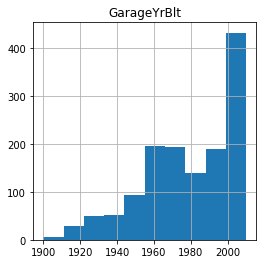

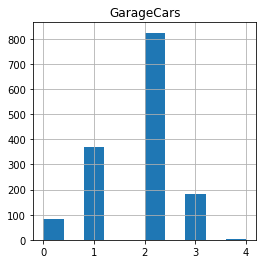

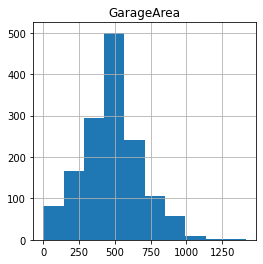

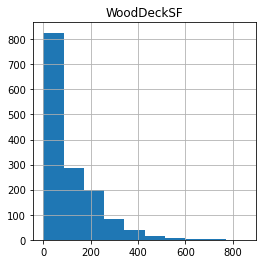

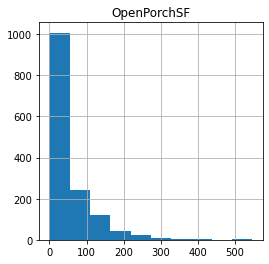

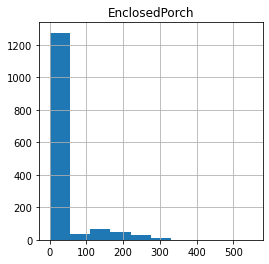

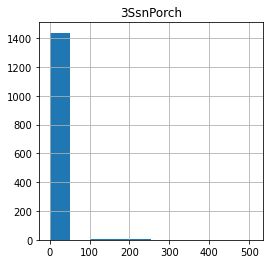

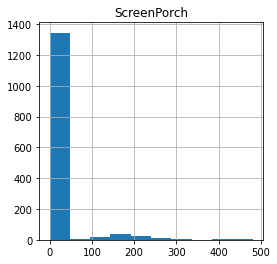

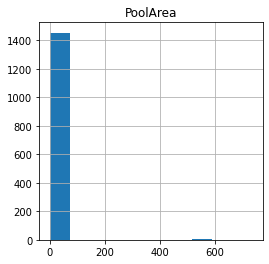

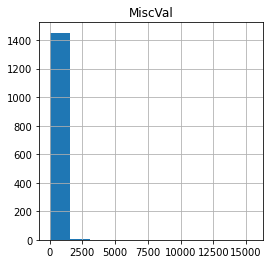

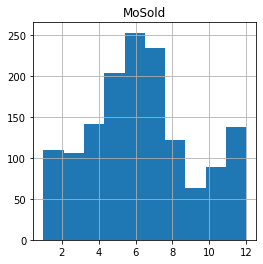

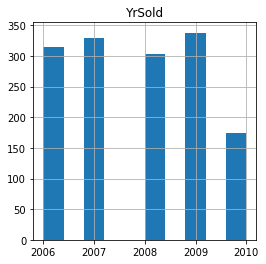

In [ ]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
for i, v in enumerate(numerical):
    plt.figure(i); plt.title(v)
    train[v].hist()

Построим гистограммы категориальных признаков

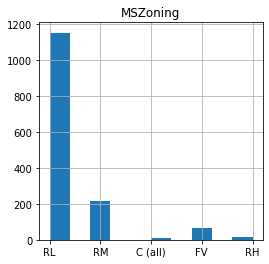

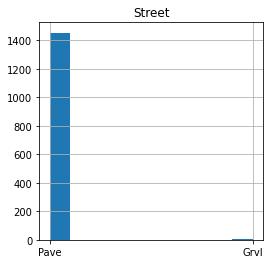

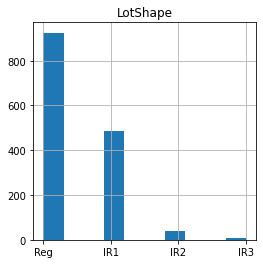

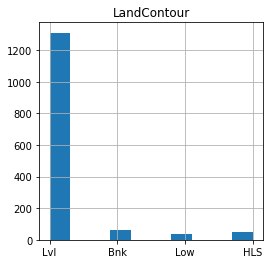

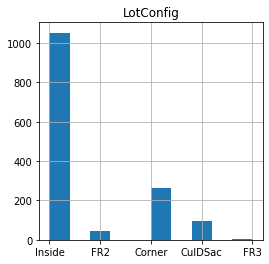

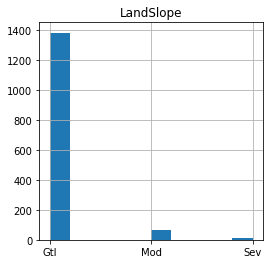

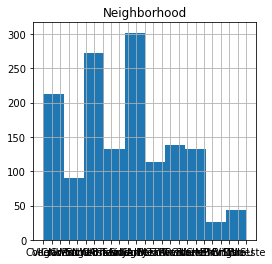

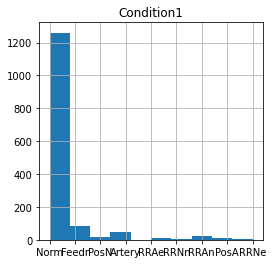

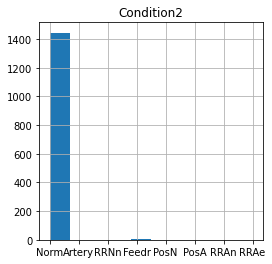

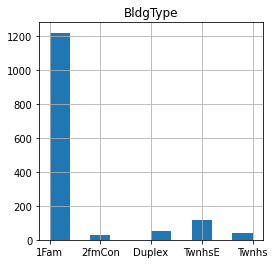

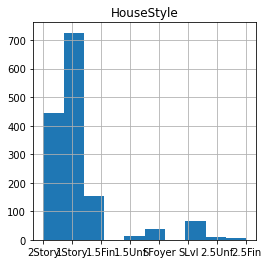

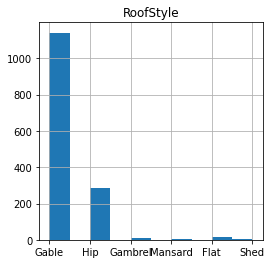

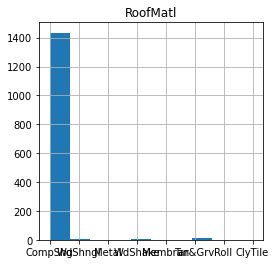

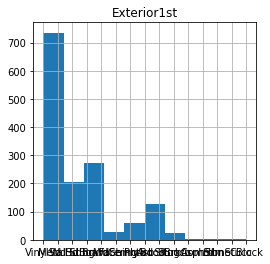

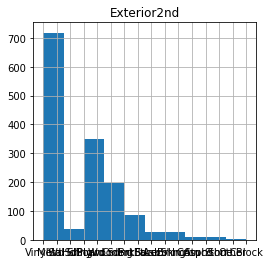

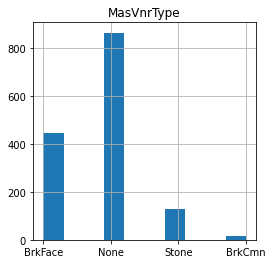

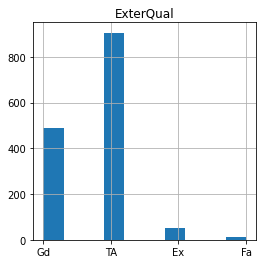

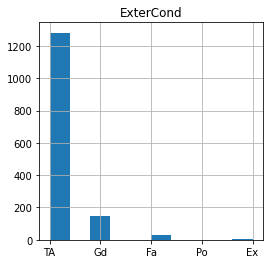

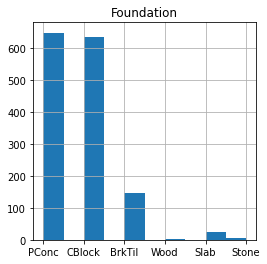

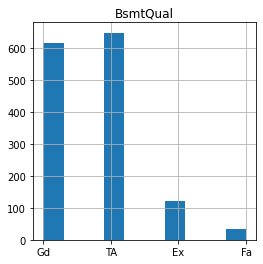

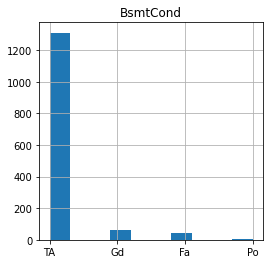

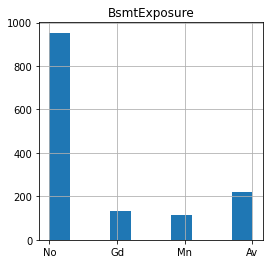

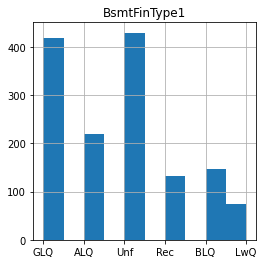

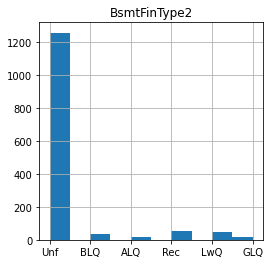

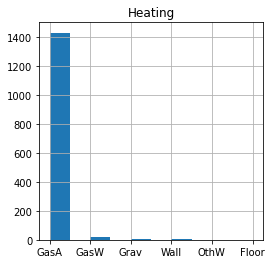

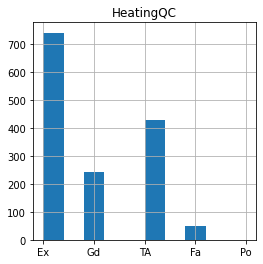

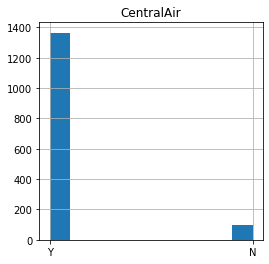

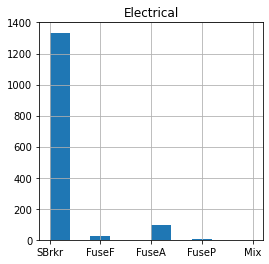

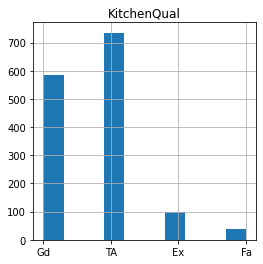

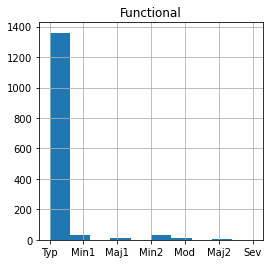

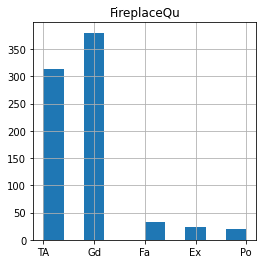

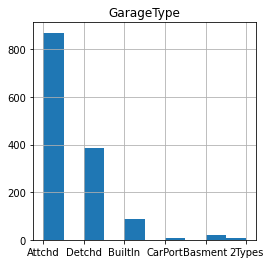

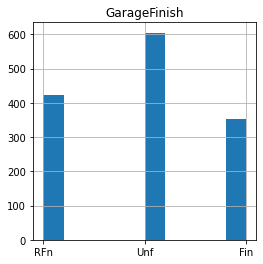

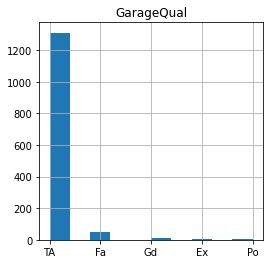

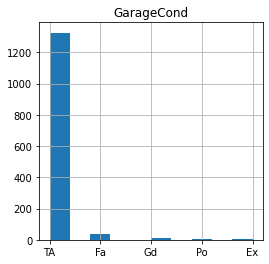

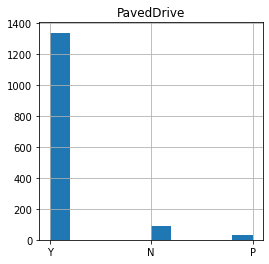

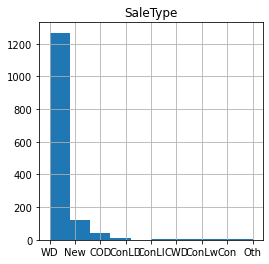

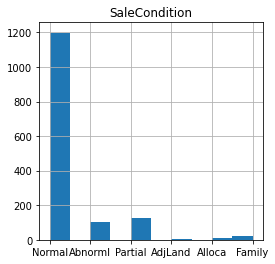

In [ ]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
for i, v in enumerate(categorical):
    plt.figure(i); plt.title(v)
    train[v].hist()

## Пример логарифмирования признака

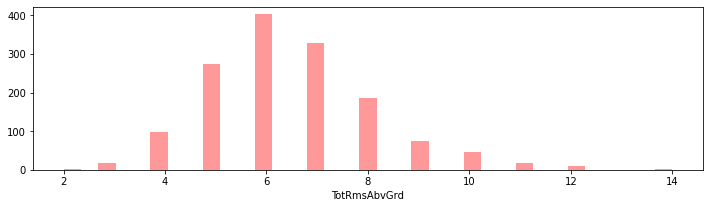

In [ ]:
plt.figure(figsize=(12, 3))
sns.distplot(data_train.TotRmsAbvGrd, kde=False, color="red");

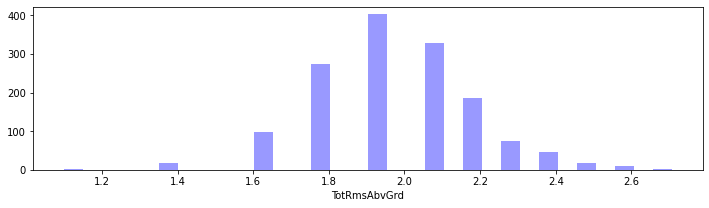

In [ ]:
plt.figure(figsize=(12, 3))
sns.distplot(np.log1p(data_train.TotRmsAbvGrd), kde=False, color="blue");

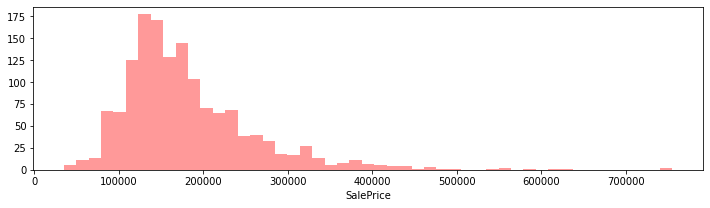

In [ ]:
plt.figure(figsize=(12, 3))
sns.distplot(target_train, kde=False, color="red");

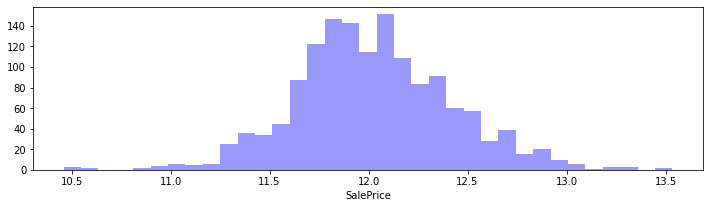

In [ ]:
plt.figure(figsize=(12, 3))
sns.distplot(np.log1p(target_train), kde=False, color="blue");

Делим данные на тестовую и тренировочную часть.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_train, target_train, test_size=0.20, random_state=42)

Кодируем категориальные признаки

In [ ]:
te = ce.target_encoder.TargetEncoder(cols=categorical)
en_train = te.fit_transform(X_train, y_train)
en_val = te.transform(X_val)

In [ ]:
en_val.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
803,60,190339.908009,63.0,8199,181511.658935,166392.48834,180623.02644,178459.70438,180274.116426,201112.008696,...,18,0,0,0,0,0,10,2008,174787.747036,175677.753112
652,70,190339.908009,60.0,9084,181511.658935,166392.48834,180623.02644,178459.70438,180274.116426,127908.850575,...,0,0,0,0,0,0,10,2009,174787.747036,175677.753112
723,20,190339.908009,70.0,8120,181511.658935,166392.48834,180623.02644,178459.70438,180274.116426,147408.204420,...,0,0,0,0,0,0,7,2009,174787.747036,175677.753112


In [ ]:
en_train.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1295,20,190339.908009,60.0,8172,181511.658935,166392.48834,180623.02644,178459.704380,180274.116426,127908.850575,...,0,0,0,0,0,0,4,2006,174787.747036,175677.753112
861,50,190339.908009,55.0,7642,181511.658935,166392.48834,180623.02644,176701.081448,180274.116426,211587.204545,...,240,0,0,0,0,0,6,2007,174787.747036,175677.753112
1127,120,190339.908009,53.0,3684,181511.658935,166392.48834,180623.02644,178459.704380,180274.116426,191468.391662,...,20,0,0,0,0,0,6,2009,174787.747036,175677.753112


Отмасштабируем признаки с помощью MinMaxScaler, для удобства опять объеденим целевой признак с остальными, а после масштабирования разделим заново.

In [ ]:
scaler_data = MinMaxScaler()


train_all = pd.concat([en_train, y_train],  axis=1)
val_all = pd.concat([en_val, y_val],  axis=1)

col_train = list(en_train.columns)
if "SalePrice" not in col_train:
    col_train.append("SalePrice")

scaler_data.fit(train_all);

In [ ]:
en_train = pd.DataFrame(scaler_data.transform(train_all), columns = col_train)
en_val = pd.DataFrame(scaler_data.transform(val_all), columns = col_train)

In [ ]:
y_train = en_train["SalePrice"]
en_train = en_train.drop(columns = "SalePrice")

y_val = en_val["SalePrice"]
en_val = en_val.drop(columns = "SalePrice")

## Автоматический отбор признаков и уменьшение размерности признакого пространства

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

### 1. Отбор признаков с помощью SelectFromModel

In [ ]:
selection_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
selector = SelectFromModel(selection_model).fit(en_train, y_train)
en_data_pruned = selector.transform(en_train)
print(en_train.columns[selector.get_support()])
print(f'Original shape: {en_train.shape}')
print(f'Shape after selection: {en_data_pruned.shape}')

en_train_feat_sel_1 = pd.DataFrame(en_data_pruned, columns = en_train.columns[selector.get_support()])
en_val_feat_sel_1 = pd.DataFrame(en_val[en_train.columns[selector.get_support()]])

Index(['Neighborhood', 'OverallQual', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'GarageCars', 'GarageArea'],
      dtype='object')
Original shape: (1168, 74)
Shape after selection: (1168, 13)


### 2. Отбор признаков с помощью Recursive Feature Elimination (RFECV)

In [ ]:
main_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
min_features_to_select = 1 
rfecv = RFECV(estimator=main_model, step=1, cv=KFold(3), 
              min_features_to_select=min_features_to_select)
rfecv.fit(en_train, y_train)

RFECV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
      estimator=ExtraTreesRegressor(random_state=42))

In [ ]:
print("Оптимальное число оставленных признаков : %d" % rfecv.n_features_)

Оптимальное число оставленных признаков : 37


In [ ]:
columns_rfecv = [en_train.columns.to_list()[i] for i, v in enumerate(rfecv.support_) if v]
en_train_feat_sel_2 = pd.DataFrame(en_train[columns_rfecv])
en_val_feat_sel_2 = pd.DataFrame(en_val[columns_rfecv])

### 3. Отбор признаков с помощью Boruta

In [ ]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestRegressor(max_depth=13, n_estimators=30), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

feat_selector.fit(np.asarray(en_train), np.asarray(y_train))

BorutaPy(estimator=RandomForestRegressor(max_depth=13, n_estimators=43,
                                         random_state=RandomState(MT19937) at 0x7F01E46A6C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F01E46A6C40)

In [ ]:
print('Количество оставленных признаков : ')
columns_boruta = pd.DataFrame(en_train.columns)[feat_selector.support_].values.reshape(1,-1).reshape(-1)
print(len(columns_boruta))
en_train_feat_sel_3 = pd.DataFrame(en_train[columns_boruta])
en_val_feat_sel_3 = pd.DataFrame(en_val[columns_boruta])

Количество оставленных признаков : 
14


### 4. Уменьшение размерности с помощью tSNE

Воспользуемся методом снижения размерности который называется t-SNE, что расшифровывается как t-distributed stochastic neighbor embedding (стохастическое вложение соседей с t-распределением). Уменьшим размерность до 20 признаков.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
size_train = en_train.shape[0]

X = np.vstack((en_train, en_val))

tsne = TSNE(n_components=20, method='exact', learning_rate='auto', init='random', random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X)

en_train_tsne = X_tsne[0:size_train, :]
en_val_tsne  = X_tsne[size_train:,:]

### 5. Уменьшение размерности с помощью PCA

Создадим еще один набор данных воспользовавшись методом главных компонент (Principal Component Analisys). Уменьшим размерность до 20 признаков.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

en_train_pca = pca.fit_transform(en_train)

In [ ]:
en_val_pca = pca.transform(en_val)

## Влияние признаков друг на друга и целевую переменную
**Mutual information** измеряет долю информации, общей для обоих разбиений: 
насколько информация об одном из них уменьшает неопределенность относительно другого.
Смотрим на силу взаимосвязи между категориальными признаками и целевым признаком. Насколько можно объяснить
изменения одного признака с помощью другого.

In [ ]:
def get_mutual_info_score(series):
    return mutual_info_score(series, y_train)

categorical2 = en_train[categorical].apply(get_mutual_info_score).sort_values(ascending=False)

categorical2

Neighborhood     2.079800
Exterior2nd      1.236318
Exterior1st      1.179650
BsmtFinType1     1.023536
FireplaceQu      0.803574
GarageFinish     0.787910
HouseStyle       0.780788
BsmtQual         0.764951
GarageType       0.715077
KitchenQual      0.694074
BsmtExposure     0.693255
Foundation       0.669071
HeatingQC        0.657162
ExterQual        0.609310
MasVnrType       0.594426
LotConfig        0.512078
LotShape         0.480813
SaleCondition    0.464113
MSZoning         0.436114
SaleType         0.409391
BsmtFinType2     0.408227
Condition1       0.404803
BldgType         0.403710
RoofStyle        0.375104
BsmtCond         0.314002
GarageQual       0.296387
LandContour      0.278538
ExterCond        0.273822
GarageCond       0.268625
Functional       0.233505
Electrical       0.221791
PavedDrive       0.206666
CentralAir       0.173981
LandSlope        0.152146
Heating          0.108463
RoofMatl         0.073526
Condition2       0.048340
Street           0.018278
dtype: float

Выведем корреляцию численных признаков друг с другом и целевым признаком

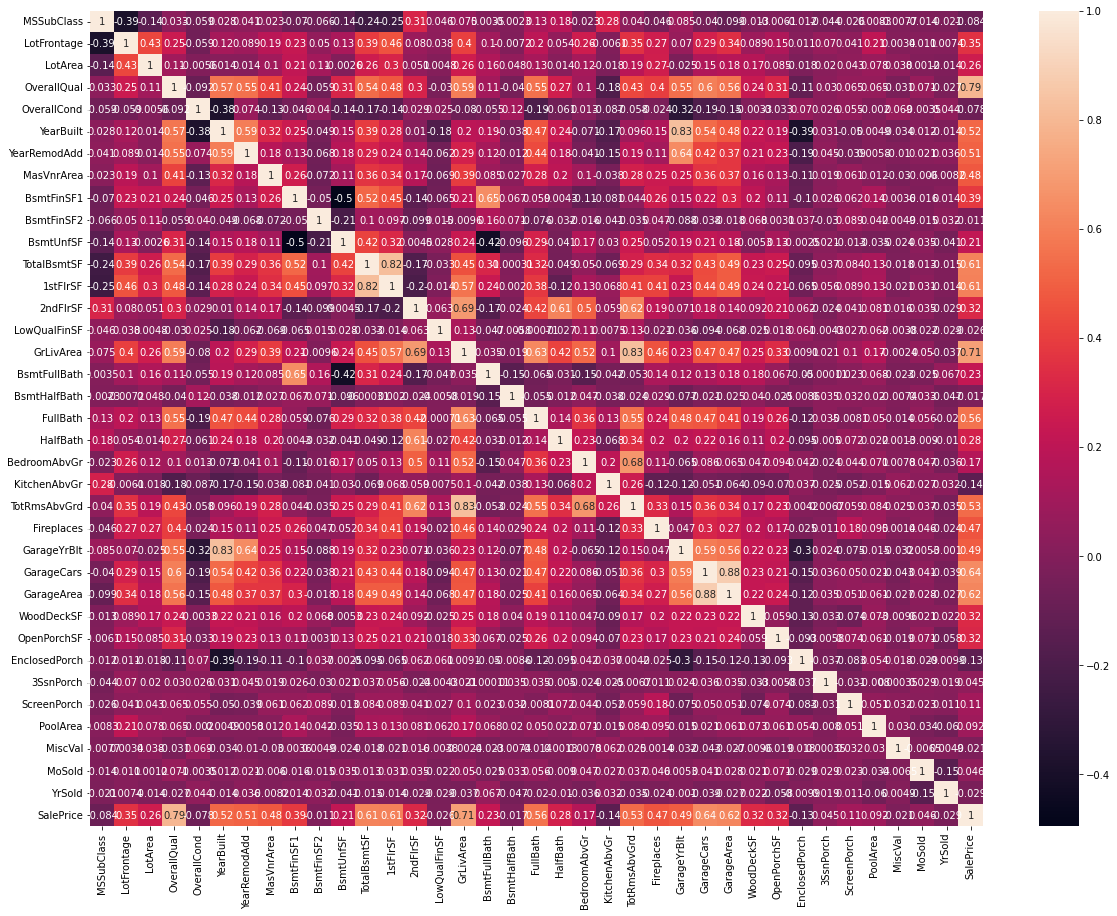

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)
numerical2 = [*numerical]
numerical2.append('SalePrice')
numerical2
c = train[numerical2].corr()

sns.heatmap(c, annot=True);

In [ ]:
correlation = c.sort_values(by='SalePrice', ascending=False)
numer_2 = correlation[1:]['SalePrice']
numer_2

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Возьмем категориальные признаки у которых mutual_score выше 0.4, а числовые признаки с коэффициетом корреляции Пирсона с целевым признаком более 0.3.

In [ ]:
numer = (numer_2[numer_2 > 0.3]).index.to_list()
categor = (categorical2[categorical2 > 0.4]).index.to_list()


In [ ]:
en_train_feat_sel_manual = en_train[numer + categor]
en_val_feat_sel_manual = en_val[numer + categor]

Как мы видим есть целый ряд признаков и численных и категориальных имеющих связь с целевой переменной. Экспериментов с выбором признаков на основе матрицы корреляций и mutual information не проводилось в связи с нехваткой времени. Но с их помощью так же можно производить отбор значимых признаков с йелью уменьшения признакового пространства.

# Постановка задачи и построение модели

 Задача: необходимо предсказать окончательную цену каждого дома основываясь на наборе признаков который остался после чистки. В качестве оценки качества модели используется RMSE.

 Опробованы следующие регрессионные модели:
 *  случайный лес
 *  градиентный бустинг
 *  метод ближайших соседей
 *  линейная регрессия
 *  линейная регрессия с L1 регуляризацией
 *  линейная регрессия с L2 регуляризацией
 *  регрессор на основе нейросети

 
 
 Так же опробованы системы автоматического подбора параметров:
 *  Random grid search
 *  Distributed Hyperparameter Optimization

Эксперименты проведены на полных данных, а после, с целью сравнения, на всех полученных наборах данных от методов понижения размерности и автоматического отбора признаков.

###Случайный лес с поиском по сетке значений (RandomForestRegressor + GridSearchCV)

**Случайный лес** с поиском по сетке значений (RandomForestRegressor + GridSearchCV)

In [ ]:
grid = {
    'criterion': ['squared_error', 'friedman_mse'], 
    'max_depth': [3, 7, 10, 20],
    'min_samples_split': [2, 8, 16, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2']
}

best_parameters = None
best_valid_rmse = 10000000
for n_estimators in [5, 15, 30]:
    print(f'n_estimators = {n_estimators}')
    estimator = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    clf_rf = GridSearchCV(estimator, grid)
    clf_rf.fit(en_train, y_train)
    print(f'best rmse: {mean_squared_error(clf_rf.best_estimator_.predict(en_train), y_train, squared = False)}')
    print(f'best parameters: {clf_rf.best_params_}')

    valid_rmse = mean_squared_error(y_val, clf_rf.best_estimator_.predict(en_val), squared = False)
    print(f'RMSE on validation: {valid_rmse}')
    if valid_rmse < best_valid_rmse:
        best_valid_rmse = valid_rmse
        best_parameters = clf_rf.best_params_
        best_parameters['n_estimators'] = n_estimators
    print()

n_estimators = 5
best rmse: 0.02565354826534521
best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE on validation: 0.04599513011010191

n_estimators = 15
best rmse: 0.022321428588647774
best parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE on validation: 0.042757826305227696

n_estimators = 30
best rmse: 0.020368921288765815
best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE on validation: 0.04559698468749997



In [ ]:
def rand_forest_grid(x_data, y_train, x_val, y_val):
    grid = {
        'criterion': ['squared_error', 'friedman_mse'], 
        'max_depth': [3, 7, 10, 20],
        'min_samples_split': [2, 8, 16, 20],
        'min_samples_leaf': [1, 3, 5, 10],
        'max_features': ['sqrt', 'log2']
    }

    best_parameters = None
    best_valid_rmse = 10000000
    for n_estimators in [5, 15, 30]:
        print(f'n_estimators = {n_estimators}')
        estimator = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        clf_rf = GridSearchCV(estimator, grid)
        clf_rf.fit(x_data, y_train)
        print(f'best rmse: {mean_squared_error(clf_rf.best_estimator_.predict(x_data), y_train, squared = False)}')
        print(f'best parameters: {clf_rf.best_params_}')

        valid_rmse = mean_squared_error(y_val, clf_rf.best_estimator_.predict(x_val), squared = False)
        print(f'RMSE on validation: {valid_rmse}')
        if valid_rmse < best_valid_rmse:
            best_valid_rmse = valid_rmse
            best_parameters = clf_rf.best_params_
            best_parameters['n_estimators'] = n_estimators
        print()


## Cлучайный лес

Теперь попробуем подбора параметров случайного леса, но с помощью библиотеки распределенной оптимизаций гиперпараметров hyperopt.

**1.1 Случайный лес для полных данных**.

In [ ]:
from sklearn.model_selection import cross_val_score


def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train, y_train)
    score = cross_val_score(clf, en_train, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


param_space_1 = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 20)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'n_estimators': hp.choice('n_estimators', range(5, 100)),
    'criterion': hp.choice('criterion', ['squared_error', 'friedman_mse'])}

best = 10000000
def f(params):
    global best
    rmse = rmse_model(params)
    if rmse < best:
        best = rmse
    print (f"new best:  {best}   current loss:  {rmse}")
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()
best_1 = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))
print ('best:')
print (best_1)


new best:  0.002013555130129119   current loss:  0.002013555130129119
new best:  0.0019420568604071036   current loss:  0.0019420568604071036
new best:  0.0019420568604071036   current loss:  0.00201222419526615
new best:  0.0019420568604071036   current loss:  0.0022186131841499695
new best:  0.0019420568604071036   current loss:  0.002693545132603133
new best:  0.0019323250121938342   current loss:  0.0019323250121938342
new best:  0.0019323250121938342   current loss:  0.003245900990820566
new best:  0.0019323250121938342   current loss:  0.0020290274076035283
new best:  0.0019323250121938342   current loss:  0.0027131556179584284
new best:  0.0019323250121938342   current loss:  0.002116025971199207
new best:  0.0019323250121938342   current loss:  0.0021669402096539383
new best:  0.0019323250121938342   current loss:  0.0020066686700398687
new best:  0.001911017347030003   current loss:  0.001911017347030003
new best:  0.001911017347030003   current loss:  0.0023276524090072824
ne

In [ ]:
from hyperopt import space_eval

clf_rf_ho = RandomForestRegressor(**space_eval(param_space_1, best_1), random_state=42)
clf_rf_ho.fit(en_train, y_train)
print("RandomForestRegressor после hyperopt: ")
print(mean_squared_error(y_val, clf_rf_ho.predict(en_val), squared = False))

RandomForestRegressor после hyperopt: 
0.04241000394159656


**1.2 Случайный лес для данных от метода SelectFromModel**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_feat_sel_1, y_train)
    score = cross_val_score(clf, en_train_feat_sel_1, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_1 = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))


new best:  0.0018189930384419225   current loss:  0.0018189930384419225
new best:  0.0018189930384419225   current loss:  0.0018624326969520649
new best:  0.0018189930384419225   current loss:  0.001829661141735613
new best:  0.0018189930384419225   current loss:  0.002014247814779317
new best:  0.0018189930384419225   current loss:  0.0022838247470069297
new best:  0.0017698570978328756   current loss:  0.0017698570978328756
new best:  0.0017698570978328756   current loss:  0.002834529865366341
new best:  0.0017698570978328756   current loss:  0.0019176028880115328
new best:  0.0017698570978328756   current loss:  0.002269144045482754
new best:  0.0017698570978328756   current loss:  0.0020393303476068042
new best:  0.0017698570978328756   current loss:  0.0020146915302531885
new best:  0.0017698570978328756   current loss:  0.0019941956319317875
new best:  0.0017698570978328756   current loss:  0.0018543966492879406
new best:  0.0017698570978328756   current loss:  0.0023468613215556

In [ ]:
clf_rf_ho_1 = RandomForestRegressor(**space_eval(param_space_1, best_1_1), random_state=42)
clf_rf_ho_1.fit(en_train_feat_sel_1, y_train)
print("RandomForestRegressor после hyperopt для данных от SelectFromModel: ")
print(mean_squared_error(y_val, clf_rf_ho_1.predict(en_val_feat_sel_1), squared = False))

RandomForestRegressor после hyperopt для данных от SelectFromModel: 
0.039041493709715505


**1.3 Случайный лес для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_feat_sel_2, y_train)
    score = cross_val_score(clf, en_train_feat_sel_2, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_2 = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))

new best:  0.0018112084072089772   current loss:  0.0018112084072089772
new best:  0.0017509392200404498   current loss:  0.0017509392200404498
new best:  0.0017509392200404498   current loss:  0.001880734338324037
new best:  0.0017509392200404498   current loss:  0.001985106931990538
new best:  0.0017509392200404498   current loss:  0.00236188441109379
new best:  0.0017509392200404498   current loss:  0.0017626891469138199
new best:  0.0017509392200404498   current loss:  0.0026206864600471316
new best:  0.0017509392200404498   current loss:  0.0019014936028552407
new best:  0.0017509392200404498   current loss:  0.002372151852389988
new best:  0.0017509392200404498   current loss:  0.0019576594419348768
new best:  0.0017509392200404498   current loss:  0.001948606537542992
new best:  0.0017509392200404498   current loss:  0.001966594246086932
new best:  0.0017509392200404498   current loss:  0.0017987584394629497
new best:  0.0017509392200404498   current loss:  0.0023256849804191883

In [ ]:
clf_rf_ho_2 = RandomForestRegressor(**space_eval(param_space_1, best_1_2), random_state=42)
clf_rf_ho_2.fit(en_train_feat_sel_2, y_train)
print("RandomForestRegressor после hyperopt для данных после Recursive Feature Elimination (RFECV): ")
print(mean_squared_error(y_val, clf_rf_ho_2.predict(en_val_feat_sel_2), squared = False))

RandomForestRegressor после hyperopt для данных после Recursive Feature Elimination (RFECV): 
0.04032212943956934


**1.4 Случайный лес для данных от метода Boruta**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_feat_sel_3, y_train)
    score = cross_val_score(clf, en_train_feat_sel_3, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_3 = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))

new best:  0.001821868946792186   current loss:  0.001821868946792186
new best:  0.0017903621809168668   current loss:  0.0017903621809168668
new best:  0.0017903621809168668   current loss:  0.0018559705464666347
new best:  0.0017903621809168668   current loss:  0.0019704527858294316
new best:  0.0017903621809168668   current loss:  0.0023143181933793352
new best:  0.0017612561167004302   current loss:  0.0017612561167004302
new best:  0.0017612561167004302   current loss:  0.002734470452653423
new best:  0.0017612561167004302   current loss:  0.0019331293299229269
new best:  0.0017612561167004302   current loss:  0.0023541797705186303
new best:  0.0017612561167004302   current loss:  0.0018466855462039016
new best:  0.0017612561167004302   current loss:  0.0020789097792570004
new best:  0.0017612561167004302   current loss:  0.001987376119368952
new best:  0.0017612561167004302   current loss:  0.0018438626704681536
new best:  0.0017612561167004302   current loss:  0.0022010445405111

In [ ]:
clf_rf_ho_3 = RandomForestRegressor(**space_eval(param_space_1, best_1_3), random_state=42)
clf_rf_ho_3.fit(en_train_feat_sel_3, y_train)
print("RandomForestRegressor после hyperopt для данных после Boruta: ")
print(mean_squared_error(y_val, clf_rf_ho_3.predict(en_val_feat_sel_3), squared = False))

RandomForestRegressor после hyperopt для данных после Boruta: 
0.04157873317978548


**1.5 Случайный лес для данных после метода tSNE**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_tsne, y_train)
    score = cross_val_score(clf, en_train_tsne, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_tsne = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))

new best:  0.005744425791882077   current loss:  0.005744425791882077
new best:  0.00571167196065838   current loss:  0.00571167196065838
new best:  0.00571167196065838   current loss:  0.005884586031697077
new best:  0.00571167196065838   current loss:  0.005746182387306479
new best:  0.00571167196065838   current loss:  0.006178197661444359
new best:  0.005605379645566297   current loss:  0.005605379645566297
new best:  0.005605379645566297   current loss:  0.006542578452385925
new best:  0.005605379645566297   current loss:  0.005690424132132782
new best:  0.005605379645566297   current loss:  0.006194018954602899
new best:  0.005605379645566297   current loss:  0.006087270421384871
new best:  0.005605379645566297   current loss:  0.005768809273032005
new best:  0.005605379645566297   current loss:  0.005771587163353941
new best:  0.005605379645566297   current loss:  0.005627325811735872
new best:  0.005605379645566297   current loss:  0.006491018638680607
new best:  0.005605379645

In [ ]:
clf_rf_ho_tsne = RandomForestRegressor(**space_eval(param_space_1, best_1_tsne), random_state=42)
clf_rf_ho_tsne.fit(en_train_tsne, y_train)
print("RandomForestRegressor после hyperopt для данных после tSNE: ")
print(mean_squared_error(y_val, clf_rf_ho_tsne.predict(en_val_tsne), squared = False))


RandomForestRegressor после hyperopt для данных после tSNE: 
0.08445400303542665


**1.6 Случайный лес для данных после метода PCA**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_pca, y_train)
    score = cross_val_score(clf, en_train_pca, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_pca = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))

new best:  0.0032917706019161253   current loss:  0.0032917706019161253
new best:  0.003038660381284562   current loss:  0.003038660381284562
new best:  0.003038660381284562   current loss:  0.0033113375365796506
new best:  0.003038660381284562   current loss:  0.003378168431019552
new best:  0.003038660381284562   current loss:  0.0049831316164134125
new best:  0.0029293668690332777   current loss:  0.0029293668690332777
new best:  0.0029293668690332777   current loss:  0.005468679221010127
new best:  0.0029293668690332777   current loss:  0.003204136951420805
new best:  0.0029293668690332777   current loss:  0.004956071715179445
new best:  0.0029293668690332777   current loss:  0.00309586563237802
new best:  0.0029293668690332777   current loss:  0.00357968601431924
new best:  0.0029293668690332777   current loss:  0.0033341719748440544
new best:  0.0029293668690332777   current loss:  0.003064279930427977
new best:  0.0029293668690332777   current loss:  0.004456344689565356
new bes

In [ ]:
clf_rf_ho_pca = RandomForestRegressor(**space_eval(param_space_1, best_1_pca), random_state=42)
clf_rf_ho_pca.fit(en_train_pca, y_train)
print("RandomForestRegressor после hyperopt для данных после PCA: ")
print(mean_squared_error(y_val, clf_rf_ho_pca.predict(en_val_pca), squared = False))

RandomForestRegressor после hyperopt для данных после PCA: 
0.061431175000161216


**1.7 Случайный лес для данных после ручного отбора**

In [ ]:
def rmse_model(params):
    clf = RandomForestRegressor(**params, random_state=42)
    clf.fit(en_train_feat_sel_manual, y_train)
    score = cross_val_score(clf, en_train_feat_sel_manual, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


best = 10000000
trials = Trials()
best_1_manual = fmin(f, param_space_1, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42))

new best:  0.0019203658067895174   current loss:  0.0019203658067895174
new best:  0.0019203658067895174   current loss:  0.001921109169753411
new best:  0.0019203658067895174   current loss:  0.001972819770449073
new best:  0.0019203658067895174   current loss:  0.0020657359533631497
new best:  0.0019203658067895174   current loss:  0.0024506794656577557
new best:  0.0018387147790609299   current loss:  0.0018387147790609299
new best:  0.0018387147790609299   current loss:  0.0030727526624014525
new best:  0.0018387147790609299   current loss:  0.0019987081952102083
new best:  0.0018387147790609299   current loss:  0.0024470045924319876
new best:  0.0018387147790609299   current loss:  0.0019510922363299098
new best:  0.0018387147790609299   current loss:  0.0020864314429978564
new best:  0.0018387147790609299   current loss:  0.002037918834254343
new best:  0.0018387147790609299   current loss:  0.0018966690516913332
new best:  0.0018387147790609299   current loss:  0.002279030093124

In [ ]:
clf_rf_ho_manual = RandomForestRegressor(**space_eval(param_space_1, best_1_manual), random_state=42)
clf_rf_ho_manual.fit(en_train_feat_sel_manual, y_train)
print("RandomForestRegressor после hyperopt для данных после ручного отбора признаков: ")
print(mean_squared_error(y_val, clf_rf_ho_manual.predict(en_val_feat_sel_manual), squared = False))


RandomForestRegressor после hyperopt для данных после ручного отбора признаков: 
0.04262711848697393


##Линейная регрессия

**2.1 Линейная регрессия для полных данных**

In [ ]:
lin_reg = LinearRegression().fit(en_train, y_train)
print("LinearRegression : ")
print(mean_squared_error(y_val, lin_reg.predict(en_val), squared = False))

LinearRegression : 
0.044761561801425334


**2.2 Линейная регрессия для данных от метода SelectFromModel**

In [ ]:
lin_reg_1 = LinearRegression().fit(en_train_feat_sel_1, y_train)
print("LinearRegression для данных от метода SelectFromModel : ")
print(mean_squared_error(y_val, lin_reg_1.predict(en_val_feat_sel_1), squared = False))

LinearRegression для данных от метода SelectFromModel : 
0.04793414526223673


**2.3 Линейная регрессия для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
lin_reg_2 = LinearRegression().fit(en_train_feat_sel_2, y_train)
print("LinearRegression для данных от метода Recursive Feature Elimination (RFECV) : ")
print(mean_squared_error(y_val, lin_reg_2.predict(en_val_feat_sel_2), squared = False))

LinearRegression для данных от метода Recursive Feature Elimination (RFECV) : 
0.045839990954291684


**2.4: Линейная регрессия для данных от метода Boruta**

In [ ]:
lin_reg_3 = LinearRegression().fit(en_train_feat_sel_3, y_train)
print("LinearRegression для данных от метода Boruta : ")
print(mean_squared_error(y_val, lin_reg_3.predict(en_val_feat_sel_3), squared = False))

LinearRegression для данных от метода Boruta : 
0.04949585392756574


**2.5 Линейная регрессия для данных после метода tSNE**

In [ ]:
lin_reg_tsne = LinearRegression().fit(en_train_tsne, y_train)
print("LinearRegression для данных после метода tSNE : ")
print(mean_squared_error(y_val, lin_reg_tsne.predict(en_val_tsne), squared = False))

LinearRegression для данных после метода tSNE : 
0.09309745199960782


**2.6 Линейная регрессия для данных после метода PCA**

In [ ]:
lin_reg_pca = LinearRegression().fit(en_train_pca, y_train)
print("LinearRegression для данных после метода PCA : ")
print(mean_squared_error(y_val, lin_reg_pca.predict(en_val_pca), squared = False))

LinearRegression для данных после метода PCA : 
0.05323720759943967


**2.7 Линейная регрессия для данных после ручного отбора**

In [ ]:
lin_reg_manual = LinearRegression().fit(en_train_feat_sel_manual, y_train)
print("LinearRegression для данных после ручного отбора : ")
print(mean_squared_error(y_val, lin_reg_manual.predict(en_val_feat_sel_manual), squared = False))

LinearRegression для данных после ручного отбора : 
0.045713227829954406


##Линейная регрессия с L1 регуляризацией (Lasso)

**3.1 Линейная регрессия с L1 регуляризацией (Lasso) для полных данных**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train, y_train)
    score = cross_val_score(clf, en_train, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

param_space_3 = {
    'alpha': hp.choice('alpha',[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 7, 10, 15]),
    }

best = 10000000
trials = Trials()
best_3 = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.0022245388653965095
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.011841201460691595
new best:  0.0022245388653965095   current loss:  0.0022245388653965095
new bes

In [ ]:
clf_lasso_ho = linear_model.Lasso(**space_eval(param_space_3, best_3))
clf_lasso_ho.fit(en_train, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso): ")
print(mean_squared_error(y_val, clf_lasso_ho.predict(en_val), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso): 
0.05125029070652287


**3.2 Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода SelectFromModel**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_feat_sel_1, y_train)
    score = cross_val_score(clf, en_train_feat_sel_1, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_1 = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.0024857744329988014
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.011841201460691595
new best:  0.0024857744329988014   current loss:  0.0024857744329988014
new bes

In [ ]:
clf_lasso_ho_1 = linear_model.Lasso(**space_eval(param_space_3, best_3_1))
clf_lasso_ho_1.fit(en_train_feat_sel_1, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода SelectFromModel: ")
print(mean_squared_error(y_val, clf_lasso_ho_1.predict(en_val_feat_sel_1), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода SelectFromModel: 
0.05374193868325586


**3.3 Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_feat_sel_2, y_train)
    score = cross_val_score(clf, en_train_feat_sel_2, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_2 = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.002239249861947879
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.011841201460691595
new best:  0.002239249861947879   current loss:  0.002239249861947879
new best:  0.0022392

In [ ]:
clf_lasso_ho_2 = linear_model.Lasso(**space_eval(param_space_3, best_3_2))
clf_lasso_ho_2.fit(en_train_feat_sel_2, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Recursive Feature Elimination (RFECV): ")
print(mean_squared_error(y_val, clf_lasso_ho_2.predict(en_val_feat_sel_2), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Recursive Feature Elimination (RFECV): 
0.0512621815410986


**3.4 Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Boruta**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_feat_sel_3, y_train)
    score = cross_val_score(clf, en_train_feat_sel_3, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_3 = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.0025783791917213116
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.011841201460691595
new best:  0.0025783791917213116   current loss:  0.0025783791917213116
new bes

In [ ]:
clf_lasso_ho_3 = linear_model.Lasso(**space_eval(param_space_3, best_3_3))
clf_lasso_ho_3.fit(en_train_feat_sel_3, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Boruta: ")
print(mean_squared_error(y_val, clf_lasso_ho_3.predict(en_val_feat_sel_3), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных от метода Boruta: 
0.05486474954448799


**3.5 Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода tSNE**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_tsne, y_train)
    score = cross_val_score(clf, en_train_tsne, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_tsne = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460835223   current loss:  0.011841201460835223
new best:  0.011841201460835223   current loss:  0.011841201460835223
new best:  0.011841201460835223   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.006842576357459655
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.011841201460835223
new best:  0.006842576357459655   current loss:  0.006842576357459655
new best:  0.0068425

In [ ]:
clf_lasso_ho_tsne = linear_model.Lasso(**space_eval(param_space_3, best_3_tsne))
clf_lasso_ho_tsne.fit(en_train_tsne, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода tSNE: ")
print(mean_squared_error(y_val, clf_lasso_ho_tsne.predict(en_val_tsne), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода tSNE: 
0.09316604752988775


**3.6 Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода PCA**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_pca, y_train)
    score = cross_val_score(clf, en_train_pca, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_pca = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.002612701541457328
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.011841201460691595
new best:  0.002612701541457328   current loss:  0.002612701541457328
new best:  0.0026127

In [ ]:
clf_lasso_ho_pca = linear_model.Lasso(**space_eval(param_space_3, best_3_pca))
clf_lasso_ho_pca.fit(en_train_pca, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода PCA: ")
print(mean_squared_error(y_val, clf_lasso_ho_pca.predict(en_val_pca), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных после метода PCA: 
0.05750034402721767


**3.7 Линейная регрессия с L1 регуляризацией (Lasso) для данных после ручного отбора**

In [ ]:
def rmse_model(params):
    clf = linear_model.Lasso(**params)
    clf.fit(en_train_feat_sel_manual, y_train)
    score = cross_val_score(clf, en_train_feat_sel_manual, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_3_manual = fmin(f, param_space_3, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42))


new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.011841201460691595   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.0023807117793680868
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.011841201460691595
new best:  0.0023807117793680868   current loss:  0.0023807117793680868
new bes

In [ ]:
clf_lasso_ho_manual = linear_model.Lasso(**space_eval(param_space_3, best_3_manual))
clf_lasso_ho_manual.fit(en_train_feat_sel_manual, y_train)

print("Линейная регрессия с L1 регуляризацией (Lasso) для данных после ручного отбора: ")
print(mean_squared_error(y_val, clf_lasso_ho_manual.predict(en_val_feat_sel_manual), squared = False))


Линейная регрессия с L1 регуляризацией (Lasso) для данных после ручного отбора: 
0.05254410282152305


##Линейная регрессия с L2 регуляризацией (Ridge)

**4.1 Линейная регрессия с L2 регуляризацией (Ridge) для полных данных**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train, y_train)
    score = cross_val_score(clf, en_train, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()


param_space_4 = {
    'alpha': hp.choice('alpha', [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 7, 10, 15]),
    }

best = 10000000
def f(params):
    global best
    rmse = rmse_model(params)
    if rmse < best:
        best = rmse
    print (f"new best:  {best}   current loss:  {rmse}    {params}")
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()
best_4 = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.0020766345608034544   current loss:  0.0020766345608034544    {'alpha': 15}
new best:  0.002027869354221204   current loss:  0.002027869354221204    {'alpha': 7}
new best:  0.002027869354221204   current loss:  0.0020366788380307243    {'alpha': 5}
new best:  0.002027869354221204   current loss:  0.0024303415190658345    {'alpha': 0.001}
new best:  0.002027869354221204   current loss:  0.0020366788380307243    {'alpha': 5}
new best:  0.002027869354221204   current loss:  0.0021166172913401945    {'alpha': 2}
new best:  0.002027869354221204   current loss:  0.0022785433896150217    {'alpha': 0.5}
new best:  0.002027869354221204   current loss:  0.0020366788380307243    {'alpha': 5}
new best:  0.002027869354221204   current loss:  0.0020369586705890523    {'alpha': 10}
new best:  0.002027869354221204   current loss:  0.0020369586705890523    {'alpha': 10}
new best:  0.002027869354221204   current loss:  0.0022785433896150217    {'alpha': 0.5}
new best:  0.002027869354221204 

In [ ]:
clf_ridge_ho = linear_model.Ridge(**space_eval(param_space_4, best_4))
clf_ridge_ho.fit(en_train, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для полных данных: ")
print(mean_squared_error(y_val, clf_ridge_ho.predict(en_val), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для полных данных: 
0.0467853946493171


**4.2 Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода SelectFromModel**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_feat_sel_1, y_train)
    score = cross_val_score(clf, en_train_feat_sel_1, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_1 = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.0025259377626614824   current loss:  0.0025259377626614824    {'alpha': 15}
new best:  0.0023842696116858518   current loss:  0.0023842696116858518    {'alpha': 7}
new best:  0.002353737155182523   current loss:  0.002353737155182523    {'alpha': 5}
new best:  0.002353737155182523   current loss:  0.0024132216469507656    {'alpha': 0.001}
new best:  0.002353737155182523   current loss:  0.002353737155182523    {'alpha': 5}
new best:  0.0023368799385448885   current loss:  0.0023368799385448885    {'alpha': 2}
new best:  0.0023368799385448885   current loss:  0.0023678089023353183    {'alpha': 0.5}
new best:  0.0023368799385448885   current loss:  0.002353737155182523    {'alpha': 5}
new best:  0.0023368799385448885   current loss:  0.00243715277993781    {'alpha': 10}
new best:  0.0023368799385448885   current loss:  0.00243715277993781    {'alpha': 10}
new best:  0.0023368799385448885   current loss:  0.0023678089023353183    {'alpha': 0.5}
new best:  0.002336879938544888

In [ ]:
clf_ridge_ho_1 = linear_model.Ridge(**space_eval(param_space_4, best_4_1))
clf_ridge_ho_1.fit(en_train_feat_sel_1, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода SelectFromModel: ")
print(mean_squared_error(y_val, clf_ridge_ho_1.predict(en_val_feat_sel_1), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода SelectFromModel: 
0.04877873944186078


**4.3 Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_feat_sel_2, y_train)
    score = cross_val_score(clf, en_train_feat_sel_2, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_2 = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.00213381784974545   current loss:  0.00213381784974545    {'alpha': 15}
new best:  0.0020774433488695066   current loss:  0.0020774433488695066    {'alpha': 7}
new best:  0.0020774433488695066   current loss:  0.0020795642856781477    {'alpha': 5}
new best:  0.0020774433488695066   current loss:  0.0022931980662936444    {'alpha': 0.001}
new best:  0.0020774433488695066   current loss:  0.0020795642856781477    {'alpha': 5}
new best:  0.0020774433488695066   current loss:  0.002128429615336395    {'alpha': 2}
new best:  0.0020774433488695066   current loss:  0.002217235198664636    {'alpha': 0.5}
new best:  0.0020774433488695066   current loss:  0.0020795642856781477    {'alpha': 5}
new best:  0.0020774433488695066   current loss:  0.002091202309596765    {'alpha': 10}
new best:  0.0020774433488695066   current loss:  0.002091202309596765    {'alpha': 10}
new best:  0.0020774433488695066   current loss:  0.002217235198664636    {'alpha': 0.5}
new best:  0.00207744334886950

In [ ]:
clf_ridge_ho_2 = linear_model.Ridge(**space_eval(param_space_4, best_4_2))
clf_ridge_ho_2.fit(en_train_feat_sel_2, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Recursive Feature Elimination (RFECV): ")
print(mean_squared_error(y_val, clf_ridge_ho_2.predict(en_val_feat_sel_2), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Recursive Feature Elimination (RFECV): 
0.04751150434886895


**4.4 Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Boruta**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_feat_sel_3, y_train)
    score = cross_val_score(clf, en_train_feat_sel_3, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_3 = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.0026400435553976644   current loss:  0.0026400435553976644    {'alpha': 15}
new best:  0.002464341987568559   current loss:  0.002464341987568559    {'alpha': 7}
new best:  0.0024330798923138503   current loss:  0.0024330798923138503    {'alpha': 5}
new best:  0.0024330798923138503   current loss:  0.002506537661976569    {'alpha': 0.001}
new best:  0.0024330798923138503   current loss:  0.0024330798923138503    {'alpha': 5}
new best:  0.002423176579648402   current loss:  0.002423176579648402    {'alpha': 2}
new best:  0.002423176579648402   current loss:  0.0024595978627582906    {'alpha': 0.5}
new best:  0.002423176579648402   current loss:  0.0024330798923138503    {'alpha': 5}
new best:  0.002423176579648402   current loss:  0.0025254277053350636    {'alpha': 10}
new best:  0.002423176579648402   current loss:  0.0025254277053350636    {'alpha': 10}
new best:  0.002423176579648402   current loss:  0.0024595978627582906    {'alpha': 0.5}
new best:  0.002423176579648402

In [ ]:
clf_ridge_ho_3 = linear_model.Ridge(**space_eval(param_space_4, best_4_3))
clf_ridge_ho_3.fit(en_train_feat_sel_3, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Boruta: ")
print(mean_squared_error(y_val, clf_ridge_ho_3.predict(en_val_feat_sel_3), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных от метода Boruta: 
0.05012167789484121


**4.5 Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода tSNE**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_tsne, y_train)
    score = cross_val_score(clf, en_train_tsne, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_tsne = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.006868684250126847   current loss:  0.006868684250126847    {'alpha': 15}
new best:  0.006868684250126847   current loss:  0.006870288498328192    {'alpha': 7}
new best:  0.006868684250126847   current loss:  0.006870699480558404    {'alpha': 5}
new best:  0.006868684250126847   current loss:  0.0068717444962196825    {'alpha': 0.001}
new best:  0.006868684250126847   current loss:  0.006870699480558404    {'alpha': 5}
new best:  0.006868684250126847   current loss:  0.00687132342695434    {'alpha': 2}
new best:  0.006868684250126847   current loss:  0.0068716390695829745    {'alpha': 0.5}
new best:  0.006868684250126847   current loss:  0.006870699480558404    {'alpha': 5}
new best:  0.006868684250126847   current loss:  0.006869679843103602    {'alpha': 10}
new best:  0.006868684250126847   current loss:  0.006869679843103602    {'alpha': 10}
new best:  0.006868684250126847   current loss:  0.0068716390695829745    {'alpha': 0.5}
new best:  0.006868684250126847   current

In [ ]:
clf_ridge_ho_tsne = linear_model.Ridge(**space_eval(param_space_4, best_4_tsne))
clf_ridge_ho_tsne.fit(en_train_tsne, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода tSNE: ")
print(mean_squared_error(y_val, clf_ridge_ho_tsne.predict(en_val_tsne), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода tSNE: 
0.0931033478950709


**4.6 Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода PCA**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_pca, y_train)
    score = cross_val_score(clf, en_train_pca, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_pca = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.0024262748811364728   current loss:  0.0024262748811364728    {'alpha': 15}
new best:  0.002394032198712464   current loss:  0.002394032198712464    {'alpha': 7}
new best:  0.002390496296199867   current loss:  0.002390496296199867    {'alpha': 5}
new best:  0.002390496296199867   current loss:  0.002394201271829329    {'alpha': 0.001}
new best:  0.002390496296199867   current loss:  0.002390496296199867    {'alpha': 5}
new best:  0.0023901978193067433   current loss:  0.0023901978193067433    {'alpha': 2}
new best:  0.0023901978193067433   current loss:  0.0023928365233431685    {'alpha': 0.5}
new best:  0.0023901978193067433   current loss:  0.002390496296199867    {'alpha': 5}
new best:  0.0023901978193067433   current loss:  0.0024032244864018544    {'alpha': 10}
new best:  0.0023901978193067433   current loss:  0.0024032244864018544    {'alpha': 10}
new best:  0.0023901978193067433   current loss:  0.0023928365233431685    {'alpha': 0.5}
new best:  0.00239019781930674

In [ ]:
clf_ridge_ho_pca = linear_model.Ridge(**space_eval(param_space_4, best_4_pca))
clf_ridge_ho_pca.fit(en_train_pca, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода PCA: ")
print(mean_squared_error(y_val, clf_ridge_ho_pca.predict(en_val_pca), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных после метода PCA: 
0.053395793748088456


**4.7 Линейная регрессия с L2 регуляризацией (Ridge) для данных после ручного отбора**

In [ ]:
def rmse_model(params):
    clf = linear_model.Ridge(**params)
    clf.fit(en_train_feat_sel_manual, y_train)
    score = cross_val_score(clf, en_train_feat_sel_manual, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000
trials = Trials()
best_4_manual = fmin(f, param_space_4, algo=tpe.suggest, max_evals=15, trials=trials, rstate = np.random.RandomState(42) )


new best:  0.002258787046578499   current loss:  0.002258787046578499    {'alpha': 15}
new best:  0.002198035518899216   current loss:  0.002198035518899216    {'alpha': 7}
new best:  0.002198035518899216   current loss:  0.002198700936499004    {'alpha': 5}
new best:  0.002198035518899216   current loss:  0.0024010461570933565    {'alpha': 0.001}
new best:  0.002198035518899216   current loss:  0.002198700936499004    {'alpha': 5}
new best:  0.002198035518899216   current loss:  0.0022445736861049946    {'alpha': 2}
new best:  0.002198035518899216   current loss:  0.00232949054366848    {'alpha': 0.5}
new best:  0.002198035518899216   current loss:  0.002198700936499004    {'alpha': 5}
new best:  0.002198035518899216   current loss:  0.002213690701249957    {'alpha': 10}
new best:  0.002198035518899216   current loss:  0.002213690701249957    {'alpha': 10}
new best:  0.002198035518899216   current loss:  0.00232949054366848    {'alpha': 0.5}
new best:  0.002198035518899216   current l

In [ ]:
clf_ridge_ho_manual = linear_model.Ridge(**space_eval(param_space_4, best_4_manual))
clf_ridge_ho_manual.fit(en_train_feat_sel_manual, y_train)

print("Линейная регрессия с L2 регуляризацией (Ridge) для данных после ручного отбора: ")
print(mean_squared_error(y_val, clf_ridge_ho_manual.predict(en_val_feat_sel_manual), squared = False))

Линейная регрессия с L2 регуляризацией (Ridge) для данных после ручного отбора: 
0.04745001746897092


##Метод ближайших соседей

**5.1 Метод ближайших соседей для полных данных**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train, y_train)
    score = cross_val_score(clf, en_train, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

param_space_5 = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 20)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'algorithm': hp.choice('algorithm', ['ball_tree', 'kd_tree', 'brute']),
    'p': hp.choice('p', [1, 2, 3]),
    }

best = 10000000

trials = Trials()
best_knn = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0031951017197387583   current loss:  0.0031951017197387583    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0031221737764822676   current loss:  0.0031221737764822676    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0031221737764822676   current loss:  0.004384855422955547    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0031221737764822676   current loss:  0.003245174080007543    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0031221737764822676   current loss:  0.0034646248671583017    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0031221737764822676   current loss:  0.0037053512047494617    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.002607506705975003   current loss:  0.002607506705975003    {'algorithm': 'brute', 'n_neighbors'

In [ ]:
clf_knn_ho = KNeighborsRegressor(**space_eval(param_space_5, best_knn))
clf_knn_ho.fit(en_train, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) после hyperopt: ")
print(mean_squared_error(y_val, clf_knn_ho.predict(en_val), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) после hyperopt: 
0.05293908605251863


**5.2 Метод ближайших соседей для данных от метода SelectFromModel**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_feat_sel_1, y_train)
    score = cross_val_score(clf, en_train_feat_sel_1, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_1 = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0024603887512685543   current loss:  0.0024603887512685543    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0024603887512685543   current loss:  0.00251698323002958    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0024603887512685543   current loss:  0.0037242774267630457    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0024603887512685543   current loss:  0.0025711280726893283    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0024603887512685543   current loss:  0.0026415810051652554    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0024603887512685543   current loss:  0.003057961202295848    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.0024603887512685543   current loss:  0.002650983012368523    {'algorithm': 'brute', 'n_neighbors'

In [ ]:
clf_knn_ho_1 = KNeighborsRegressor(**space_eval(param_space_5, best_knn_1))
clf_knn_ho_1.fit(en_train_feat_sel_1, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода SelectFromModel: ")
print(mean_squared_error(y_val, clf_knn_ho_1.predict(en_val_feat_sel_1), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода SelectFromModel: 
0.046557406630412114


**5.3 Метод ближайших соседей для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_feat_sel_2, y_train)
    score = cross_val_score(clf, en_train_feat_sel_2, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_2 = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0028507303679355346   current loss:  0.0028507303679355346    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0028101055360986774   current loss:  0.0028101055360986774    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0028101055360986774   current loss:  0.0037150453764169034    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0028101055360986774   current loss:  0.002899009025212648    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0028101055360986774   current loss:  0.0029695253684536476    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0028101055360986774   current loss:  0.0031465124019411468    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.0023839855626966366   current loss:  0.0023839855626966366    {'algorithm': 'brute', 'n_neighbo

In [ ]:
clf_knn_ho_2 = KNeighborsRegressor(**space_eval(param_space_5, best_knn_2))
clf_knn_ho_2.fit(en_train_feat_sel_2, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода Recursive Feature Elimination (RFECV): ")
print(mean_squared_error(y_val, clf_knn_ho_2.predict(en_val_feat_sel_2), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода Recursive Feature Elimination (RFECV): 
0.04789998667055015


**5.4 Метод ближайших соседей для данных от метода Boruta**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_feat_sel_3, y_train)
    score = cross_val_score(clf, en_train_feat_sel_3, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_3 = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0024158342737808686   current loss:  0.0024158342737808686    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0024158342737808686   current loss:  0.002479287263373466    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0024158342737808686   current loss:  0.00307403959248898    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0024158342737808686   current loss:  0.0025907083792313474    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0024158342737808686   current loss:  0.0024232233497592163    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0024158342737808686   current loss:  0.002589520174994062    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.0024158342737808686   current loss:  0.002543420925994835    {'algorithm': 'brute', 'n_neighbors':

In [ ]:
clf_knn_ho_3 = KNeighborsRegressor(**space_eval(param_space_5, best_knn_3))
clf_knn_ho_3.fit(en_train_feat_sel_3, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода Boruta: ")
print(mean_squared_error(y_val, clf_knn_ho_3.predict(en_val_feat_sel_3), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных от метода Boruta: 
0.04280766874905341


**5.5 Метод ближайших соседей для данных после метода tSNE**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_tsne, y_train)
    score = cross_val_score(clf, en_train_tsne, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_tsne = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0045074381667145405   current loss:  0.0045074381667145405    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.004261587150039589   current loss:  0.004261587150039589    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.004261587150039589   current loss:  0.0055058068270909775    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.004261587150039589   current loss:  0.004597660973606782    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.004261587150039589   current loss:  0.004442343246166938    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.004261587150039589   current loss:  0.004812877275286456    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.004261587150039589   current loss:  0.004563201413132514    {'algorithm': 'brute', 'n_neighbors': 3, 'p

In [ ]:
clf_knn_ho_tsne = KNeighborsRegressor(**space_eval(param_space_5, best_knn_tsne))
clf_knn_ho_tsne.fit(en_train_tsne, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода tSNE: ")
print(mean_squared_error(y_val, clf_knn_ho_tsne.predict(en_val_tsne), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода tSNE: 
0.0631061055418757


**5.6 Метод ближайших соседей для данных после метода PCA**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_pca, y_train)
    score = cross_val_score(clf, en_train_pca, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_pca = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0029270405027776287   current loss:  0.0029270405027776287    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0028693580684299356   current loss:  0.0028693580684299356    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0028693580684299356   current loss:  0.004550659660607344    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0028693580684299356   current loss:  0.0029997331377668206    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0028545983891560744   current loss:  0.0028545983891560744    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0028545983891560744   current loss:  0.003614677091837807    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.0028545983891560744   current loss:  0.003158858758592527    {'algorithm': 'brute', 'n_neighbors

In [ ]:
clf_knn_ho_pca = KNeighborsRegressor(**space_eval(param_space_5, best_knn_pca))
clf_knn_ho_pca.fit(en_train_pca, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода PCA: ")
print(mean_squared_error(y_val, clf_knn_ho_pca.predict(en_val_pca), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода PCA: 
0.05794469363561665


**5.7 Метод ближайших соседей для данных после ручного отбора**

In [ ]:
def rmse_model(params):
    clf = KNeighborsRegressor(**params)
    clf.fit(en_train_feat_sel_manual, y_train)
    score = cross_val_score(clf, en_train_feat_sel_manual, y_train, cv=5, scoring="neg_mean_squared_error")
    return -score.mean()

best = 10000000

trials = Trials()
best_knn_manual = fmin(f, param_space_5, algo=tpe.suggest, max_evals=100, trials=trials, rstate = np.random.RandomState(42) )

new best:  0.0030236759873678515   current loss:  0.0030236759873678515    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
new best:  0.0030236759873678515   current loss:  0.003136867411745241    {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
new best:  0.0030236759873678515   current loss:  0.004182090229720215    {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
new best:  0.0030236759873678515   current loss:  0.0030797466628009356    {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
new best:  0.0030236759873678515   current loss:  0.0033023571189422806    {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
new best:  0.0030236759873678515   current loss:  0.0033826201964853217    {'algorithm': 'brute', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
new best:  0.002755988009733753   current loss:  0.002755988009733753    {'algorithm': 'brute', 'n_neighbors'

In [ ]:
clf_knn_ho_manual = KNeighborsRegressor(**space_eval(param_space_5, best_knn_manual))
clf_knn_ho_manual.fit(en_train_feat_sel_manual, y_train)

print("Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода PCA: ")
print(mean_squared_error(y_val, clf_knn_ho_manual.predict(en_val_feat_sel_manual), squared = False))

Регрессия на основе метода k-ближайших соседей (KNeighborsRegressor) для данных после метода PCA: 
0.05265795155893642


##Градиентный бустинг

**6.1 Градиентный бустинг для полных данных**

In [ ]:

# CatBoost parameters
ctb_reg_params = {
    'learning_rate':     hp.choice('learning_rate',     np.arange(0.05, 0.31, 0.05)),
    'max_depth':         hp.choice('max_depth',         np.arange(5, 16, 1, dtype=int)),
    'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
    'n_estimators':      100,
    'eval_metric':       'RMSE',
}
ctb_fit_params = {
    'early_stopping_rounds': 10,
    'verbose': False
}
ctb_para = dict()
ctb_para['reg_params'] = ctb_reg_params
ctb_para['fit_params'] = ctb_fit_params
ctb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [ ]:
obj = HPOpt(en_train, en_val, y_train, y_val)
ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [12:09<00:00, 14.58s/it, best loss: 0.03634825786677639]


In [ ]:
ctb_opt_ho = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt[0]))
ctb_opt_ho.fit(en_train, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для полных данных: ")
print(mean_squared_error(y_val, ctb_opt_ho.predict(en_val), squared = False))

0:	learn: 0.0943637	total: 2.71ms	remaining: 268ms
1:	learn: 0.0845390	total: 6.66ms	remaining: 326ms
2:	learn: 0.0758803	total: 9.58ms	remaining: 310ms
3:	learn: 0.0688187	total: 12.2ms	remaining: 294ms
4:	learn: 0.0626651	total: 15.3ms	remaining: 291ms
5:	learn: 0.0575481	total: 18.2ms	remaining: 285ms
6:	learn: 0.0532166	total: 20.5ms	remaining: 272ms
7:	learn: 0.0492484	total: 23.1ms	remaining: 266ms
8:	learn: 0.0464640	total: 25.7ms	remaining: 260ms
9:	learn: 0.0444139	total: 28.4ms	remaining: 256ms
10:	learn: 0.0420760	total: 31.3ms	remaining: 253ms
11:	learn: 0.0404951	total: 33.9ms	remaining: 248ms
12:	learn: 0.0387227	total: 36.8ms	remaining: 246ms
13:	learn: 0.0374415	total: 39.7ms	remaining: 244ms
14:	learn: 0.0365297	total: 42.4ms	remaining: 240ms
15:	learn: 0.0356477	total: 44.7ms	remaining: 235ms
16:	learn: 0.0348133	total: 47.5ms	remaining: 232ms
17:	learn: 0.0337752	total: 50.3ms	remaining: 229ms
18:	learn: 0.0333013	total: 52.8ms	remaining: 225ms
19:	learn: 0.0328115	t

**6.2 Градиентный бустинг для данных от метода SelectFromModel**

In [ ]:
obj = HPOpt(en_train_feat_sel_1, en_val_feat_sel_1, y_train, y_val)
ctb_opt_1 = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [02:56<00:00,  3.53s/it, best loss: 0.03494893784628639]


In [ ]:
ctb_opt_ho_1 = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_1[0]))
ctb_opt_ho_1.fit(en_train_feat_sel_1, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных от метода SelectFromModel: ")
print(mean_squared_error(y_val, ctb_opt_ho_1.predict(en_val_feat_sel_1), squared = False))

0:	learn: 0.0873099	total: 2.55ms	remaining: 252ms
1:	learn: 0.0730210	total: 5.22ms	remaining: 256ms
2:	learn: 0.0628615	total: 8.07ms	remaining: 261ms
3:	learn: 0.0547946	total: 10.6ms	remaining: 255ms
4:	learn: 0.0485152	total: 13.6ms	remaining: 259ms
5:	learn: 0.0447830	total: 16.2ms	remaining: 254ms
6:	learn: 0.0417010	total: 20ms	remaining: 266ms
7:	learn: 0.0389728	total: 22.6ms	remaining: 260ms
8:	learn: 0.0374856	total: 26ms	remaining: 263ms
9:	learn: 0.0361029	total: 26.9ms	remaining: 242ms
10:	learn: 0.0347885	total: 29.2ms	remaining: 237ms
11:	learn: 0.0334275	total: 31.7ms	remaining: 233ms
12:	learn: 0.0326626	total: 33.9ms	remaining: 227ms
13:	learn: 0.0320232	total: 36.8ms	remaining: 226ms
14:	learn: 0.0313664	total: 40ms	remaining: 227ms
15:	learn: 0.0310217	total: 41.1ms	remaining: 216ms
16:	learn: 0.0304914	total: 43.6ms	remaining: 213ms
17:	learn: 0.0299276	total: 46.9ms	remaining: 214ms
18:	learn: 0.0295159	total: 49.9ms	remaining: 213ms
19:	learn: 0.0290086	total: 

**6.3 Градиентный бустинг для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
obj = HPOpt(en_train_feat_sel_2, en_val_feat_sel_2, y_train, y_val)
ctb_opt_2 = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [06:13<00:00,  7.47s/it, best loss: 0.036238646899127244]


In [ ]:
ctb_opt_ho_2 = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_2[0]))
ctb_opt_ho_2.fit(en_train_feat_sel_2, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных от метода Recursive Feature Elimination (RFECV): ")
print(mean_squared_error(y_val, ctb_opt_ho_2.predict(en_val_feat_sel_2), squared = False))

0:	learn: 0.0945327	total: 2.42ms	remaining: 239ms
1:	learn: 0.0839878	total: 4.72ms	remaining: 231ms
2:	learn: 0.0743862	total: 7ms	remaining: 226ms
3:	learn: 0.0671863	total: 9.38ms	remaining: 225ms
4:	learn: 0.0617708	total: 12ms	remaining: 228ms
5:	learn: 0.0565079	total: 14.5ms	remaining: 227ms
6:	learn: 0.0520329	total: 17.2ms	remaining: 228ms
7:	learn: 0.0480189	total: 20.1ms	remaining: 231ms
8:	learn: 0.0447274	total: 22.6ms	remaining: 229ms
9:	learn: 0.0416545	total: 25ms	remaining: 225ms
10:	learn: 0.0394760	total: 27.5ms	remaining: 223ms
11:	learn: 0.0377025	total: 30.2ms	remaining: 222ms
12:	learn: 0.0364465	total: 33.2ms	remaining: 222ms
13:	learn: 0.0349913	total: 35.7ms	remaining: 220ms
14:	learn: 0.0337907	total: 38.3ms	remaining: 217ms
15:	learn: 0.0329834	total: 41.1ms	remaining: 216ms
16:	learn: 0.0321361	total: 43.7ms	remaining: 213ms
17:	learn: 0.0313746	total: 46.4ms	remaining: 211ms
18:	learn: 0.0306957	total: 49ms	remaining: 209ms
19:	learn: 0.0301826	total: 51.

**6.4 Градиентный бустинг для данных от метода Boruta**

In [ ]:
obj = HPOpt(en_train_feat_sel_3, en_val_feat_sel_3, y_train, y_val)
ctb_opt_3 = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [05:29<00:00,  6.59s/it, best loss: 0.03485159411001998]


In [ ]:
ctb_opt_ho_3 = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_3[0]))
ctb_opt_ho_3.fit(en_train_feat_sel_3, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных от метода Borutaх: ")
print(mean_squared_error(y_val, ctb_opt_ho_3.predict(en_val_feat_sel_3), squared = False))

0:	learn: 0.0969126	total: 6.39ms	remaining: 633ms
1:	learn: 0.0847101	total: 12.9ms	remaining: 634ms
2:	learn: 0.0749469	total: 19.9ms	remaining: 643ms
3:	learn: 0.0669529	total: 27.5ms	remaining: 659ms
4:	learn: 0.0610649	total: 32.9ms	remaining: 625ms
5:	learn: 0.0558913	total: 39.4ms	remaining: 618ms
6:	learn: 0.0515201	total: 45.8ms	remaining: 608ms
7:	learn: 0.0479207	total: 53.1ms	remaining: 611ms
8:	learn: 0.0448708	total: 57.8ms	remaining: 584ms
9:	learn: 0.0423182	total: 65.2ms	remaining: 587ms
10:	learn: 0.0402264	total: 73.2ms	remaining: 592ms
11:	learn: 0.0383546	total: 79.8ms	remaining: 585ms
12:	learn: 0.0366691	total: 85.7ms	remaining: 574ms
13:	learn: 0.0349193	total: 91.9ms	remaining: 565ms
14:	learn: 0.0337813	total: 98.4ms	remaining: 558ms
15:	learn: 0.0326182	total: 104ms	remaining: 544ms
16:	learn: 0.0318654	total: 108ms	remaining: 528ms
17:	learn: 0.0311560	total: 114ms	remaining: 518ms
18:	learn: 0.0303250	total: 119ms	remaining: 509ms
19:	learn: 0.0296431	total

**6.5 Градиентный бустинг для данных после метода tSNE**

In [ ]:
obj = HPOpt(en_train_tsne, en_val_tsne, y_train, y_val)
ctb_opt_tsne = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [16:28<00:00, 19.77s/it, best loss: 0.07870178085582677]


In [ ]:
ctb_opt_ho_tsne = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_tsne[0]))
ctb_opt_ho_tsne.fit(en_train_tsne, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных после метода tSNE: ")
print(mean_squared_error(y_val, ctb_opt_ho_tsne.predict(en_val_tsne), squared = False))

0:	learn: 0.1043944	total: 14.5ms	remaining: 1.44s
1:	learn: 0.1004465	total: 29ms	remaining: 1.42s
2:	learn: 0.0964812	total: 46.3ms	remaining: 1.5s
3:	learn: 0.0934119	total: 59.6ms	remaining: 1.43s
4:	learn: 0.0904769	total: 74.5ms	remaining: 1.42s
5:	learn: 0.0882597	total: 92.2ms	remaining: 1.44s
6:	learn: 0.0860254	total: 106ms	remaining: 1.41s
7:	learn: 0.0840182	total: 118ms	remaining: 1.36s
8:	learn: 0.0819906	total: 132ms	remaining: 1.34s
9:	learn: 0.0801313	total: 148ms	remaining: 1.33s
10:	learn: 0.0783080	total: 169ms	remaining: 1.37s
11:	learn: 0.0767390	total: 183ms	remaining: 1.34s
12:	learn: 0.0752261	total: 196ms	remaining: 1.31s
13:	learn: 0.0738430	total: 213ms	remaining: 1.31s
14:	learn: 0.0724920	total: 230ms	remaining: 1.3s
15:	learn: 0.0713520	total: 246ms	remaining: 1.29s
16:	learn: 0.0701361	total: 259ms	remaining: 1.26s
17:	learn: 0.0691583	total: 272ms	remaining: 1.24s
18:	learn: 0.0684351	total: 286ms	remaining: 1.22s
19:	learn: 0.0671784	total: 300ms	remai

**6.6 Градиентный бустинг для данных после метода PCA**

In [ ]:
obj = HPOpt(en_train_pca, en_val_pca, y_train, y_val)
ctb_opt_pca = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [15:06<00:00, 18.14s/it, best loss: 0.04907198901937837]


In [ ]:
ctb_opt_ho_pca = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_tsne[0]))
ctb_opt_ho_pca.fit(en_train_pca, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных после метода PCA: ")
print(mean_squared_error(y_val, ctb_opt_ho_pca.predict(en_val_pca), squared = False))

0:	learn: 0.1037608	total: 14.5ms	remaining: 1.43s
1:	learn: 0.0979590	total: 28.8ms	remaining: 1.41s
2:	learn: 0.0938436	total: 55.2ms	remaining: 1.78s
3:	learn: 0.0894094	total: 68.8ms	remaining: 1.65s
4:	learn: 0.0857314	total: 85.2ms	remaining: 1.62s
5:	learn: 0.0818748	total: 99.6ms	remaining: 1.56s
6:	learn: 0.0781252	total: 113ms	remaining: 1.5s
7:	learn: 0.0748060	total: 127ms	remaining: 1.47s
8:	learn: 0.0717953	total: 141ms	remaining: 1.43s
9:	learn: 0.0692008	total: 160ms	remaining: 1.44s
10:	learn: 0.0669250	total: 180ms	remaining: 1.46s
11:	learn: 0.0647403	total: 194ms	remaining: 1.42s
12:	learn: 0.0630012	total: 207ms	remaining: 1.38s
13:	learn: 0.0607625	total: 226ms	remaining: 1.39s
14:	learn: 0.0590098	total: 239ms	remaining: 1.35s
15:	learn: 0.0576749	total: 260ms	remaining: 1.37s
16:	learn: 0.0560347	total: 273ms	remaining: 1.33s
17:	learn: 0.0543453	total: 286ms	remaining: 1.3s
18:	learn: 0.0528857	total: 300ms	remaining: 1.28s
19:	learn: 0.0514153	total: 313ms	rem

**6.7 Градиентный бустинг для данных после ручного отбора**

In [ ]:
obj = HPOpt(en_train_feat_sel_manual, en_val_feat_sel_manual, y_train, y_val)
ctb_opt_manual = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)



100%|██████████| 50/50 [06:56<00:00,  8.32s/it, best loss: 0.03585482929622069]


In [ ]:
ctb_opt_ho_manual = ctb.CatBoostRegressor(**space_eval(ctb_reg_params, ctb_opt_manual[0]))
ctb_opt_ho_manual.fit(en_train_feat_sel_manual, y_train)
print("Регрессия на основе градиентного бустинга (CatBoostRegressor) для данных после ручного отбора: ")
print(mean_squared_error(y_val, ctb_opt_ho_manual.predict(en_val_feat_sel_manual), squared = False))

0:	learn: 0.0995365	total: 3.07ms	remaining: 304ms
1:	learn: 0.0906060	total: 6.42ms	remaining: 315ms
2:	learn: 0.0822454	total: 10ms	remaining: 324ms
3:	learn: 0.0756348	total: 13.1ms	remaining: 315ms
4:	learn: 0.0699349	total: 17.3ms	remaining: 330ms
5:	learn: 0.0650583	total: 20.5ms	remaining: 321ms
6:	learn: 0.0615144	total: 26.9ms	remaining: 358ms
7:	learn: 0.0576686	total: 30.8ms	remaining: 354ms
8:	learn: 0.0540297	total: 34.2ms	remaining: 346ms
9:	learn: 0.0511973	total: 37.9ms	remaining: 341ms
10:	learn: 0.0485768	total: 42.1ms	remaining: 341ms
11:	learn: 0.0462159	total: 46.1ms	remaining: 338ms
12:	learn: 0.0443387	total: 51.6ms	remaining: 345ms
13:	learn: 0.0424170	total: 54.5ms	remaining: 335ms
14:	learn: 0.0407687	total: 57.6ms	remaining: 327ms
15:	learn: 0.0391582	total: 60.5ms	remaining: 318ms
16:	learn: 0.0380091	total: 63.2ms	remaining: 309ms
17:	learn: 0.0368543	total: 69.2ms	remaining: 315ms
18:	learn: 0.0357371	total: 72.1ms	remaining: 307ms
19:	learn: 0.0348147	tot

##Регрессия на основе полносвязной нейросети

**7.1 Регрессия на основе полносвязной нейросети для полных данных**

В результате небольшого количества экспериментов с оптимизаторами Adadelta, Adam, SGD, использованием слоев Dropout с разной вероятностью и переменным learning rate который меняется согласно scheduler лучшие результаты дала простая архитектура из 3-х слоев с активацией relu и конечным слоем с линейной активацией..

In [ ]:
import tensorflow as tf
import os
import random

def seed_set():
    os.environ['PYTHONHASHSEED']=str(42)
    tf.random.set_seed(42)
    np.random.seed(42)
    random.seed(42)

def nn_regressor(x_train, y_train):
    
    def scheduler(epoch, lr):
        if epoch % 20:
            return lr
        else:
            # return lr * np.exp(-0.3)
            return lr * 0.5


    
    seed_set()    
    callback = keras.callbacks.LearningRateScheduler(scheduler)

    # Model
    dim = x_train.shape[1]
    model = Sequential()
    model.add(Dense(100, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    # # Compile model
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))
    model.fit(np.array(x_train), np.array(y_train), epochs=100, batch_size=10, callbacks=[callback])
    return model

In [ ]:
nn_model = nn_regressor(en_train, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0139 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0035 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0024 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y = nn_model.predict(np.array(en_val))
print('Регрессор на Keras для полных данных : ')
mean_squared_error( y.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для полных данных : 


0.03796432927003353

**7.2 Регрессия на основе полносвязной нейросети для данных от метода SelectFromModel**

In [ ]:
nn_model_1 = nn_regressor(en_train_feat_sel_1, y_train)

Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 0.0176 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0032 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0026 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0025 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0023 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_1 = nn_model_1.predict(np.array(en_val_feat_sel_1))
print('Регрессор на Keras для данных от метода SelectFromModel : ')
mean_squared_error( y_1.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для данных от метода SelectFromModel : 


0.03693372180627142

**7.3 Регрессия на основе полносвязной нейросети для данных от метода Recursive Feature Elimination (RFECV)**

In [ ]:
nn_model_2 = nn_regressor(en_train_feat_sel_2, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0160 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0032 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0025 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0023 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_2 = nn_model_2.predict(np.array(en_val_feat_sel_2))
print('Регрессор на Keras для данных от метода Recursive Feature Elimination (RFECV) : ')
mean_squared_error( y_2.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для данных от метода Recursive Feature Elimination (RFECV) : 


0.0345505178346396

**7.4 Регрессия на основе полносвязной нейросети для данных от метода Boruta**

In [ ]:
nn_model_3 = nn_regressor(en_train_feat_sel_3, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0184 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0040 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0027 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0025 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0023 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_3 = nn_model_3.predict(np.array(en_val_feat_sel_3))
print('Регрессор на Keras для данных от метода Boruta : ')
mean_squared_error( y_3.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для данных от метода Boruta : 


0.035772309419671494

**7.5 Регрессия на основе полносвязной нейросети для данных после метода tSNE**

In [ ]:
nn_model_tsne = nn_regressor(en_train_tsne, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0172 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0073 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0067 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0062 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0059 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0057 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0054 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0053 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0050 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0047 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_tsne = nn_model_tsne.predict(np.array(en_val_tsne))
print('Регрессор на Keras для данных после метода tSNE : ')
mean_squared_error( y_tsne.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для данных после метода tSNE : 


0.09460293982721162

**7.6 Регрессия на основе полносвязной нейросети для данных после метода PCA**

In [ ]:
nn_model_pca = nn_regressor(en_train_pca, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0191 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0018 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_pca = nn_model_pca.predict(np.array(en_val_pca))
print('Регрессор на Keras для данных после метода PCA : ')
mean_squared_error( y_pca.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 3ms/step
Регрессор на Keras для данных после метода PCA : 


0.05139107227536056

**7.7 Регрессия на основе полносвязной нейросети для данных после ручного отбора**

In [ ]:
nn_model_manual = nn_regressor(en_train_feat_sel_manual, y_train)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0149 - lr: 5.0000e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0037 - lr: 5.0000e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0027 - lr: 5.0000e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0025 - lr: 5.0000e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0021 - lr: 5.0000e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0022 - lr: 5.0000e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0020 - lr: 5.0000e-04
Epoch 11/

In [ ]:
y_manual = nn_model_manual.predict(np.array(en_val_feat_sel_manual))
print('Регрессор на Keras для данных после ручного отбора : ')
mean_squared_error( y_manual.reshape(-1), y_val, squared=False)

10/10 [==============================] - 0s 2ms/step
Регрессор на Keras для данных после ручного отбора : 


0.04035599401441606

In [ ]:
title = ['RandomForestRegressor', 
         'Линейная регрессия',
         'Lasso регрессия',
         'Ridge регрессия',
         'KNeighborsRegressor',
         'Градиентный бустинг',
         'Полносвязная нейросеть']
rmse_score = [mean_squared_error(y_val, clf_rf_ho.predict(en_val), squared = False),
              mean_squared_error(y_val, lin_reg.predict(en_val), squared = False),
              mean_squared_error(y_val, clf_lasso_ho.predict(en_val), squared = False),
              mean_squared_error(y_val, clf_ridge_ho.predict(en_val), squared = False),
              mean_squared_error(y_val, clf_knn_ho.predict(en_val), squared = False),
              mean_squared_error(y_val, ctb_opt_ho.predict(en_val), squared = False),
              mean_squared_error( y.reshape(-1), y_val, squared=False)]

rmse_score_1 = [mean_squared_error(y_val, clf_rf_ho_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error(y_val, lin_reg_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error(y_val, clf_lasso_ho_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error(y_val, clf_ridge_ho_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error(y_val, clf_knn_ho_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error(y_val, ctb_opt_ho_1.predict(en_val_feat_sel_1), squared = False),
              mean_squared_error( y_1.reshape(-1), y_val, squared=False)]

rmse_score_2 = [mean_squared_error(y_val, clf_rf_ho_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error(y_val, lin_reg_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error(y_val, clf_lasso_ho_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error(y_val, clf_ridge_ho_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error(y_val, clf_knn_ho_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error(y_val, ctb_opt_ho_2.predict(en_val_feat_sel_2), squared = False),
              mean_squared_error( y_2.reshape(-1), y_val, squared=False)]

rmse_score_3 = [mean_squared_error(y_val, clf_rf_ho_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error(y_val, lin_reg_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error(y_val, clf_lasso_ho_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error(y_val, clf_ridge_ho_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error(y_val, clf_knn_ho_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error(y_val, ctb_opt_ho_3.predict(en_val_feat_sel_3), squared = False),
              mean_squared_error( y_3.reshape(-1), y_val, squared=False)]

rmse_score_tsne = [mean_squared_error(y_val, clf_rf_ho_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error(y_val, lin_reg_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error(y_val, clf_lasso_ho_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error(y_val, clf_ridge_ho_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error(y_val, clf_knn_ho_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error(y_val, ctb_opt_ho_tsne.predict(en_val_tsne), squared = False),
                mean_squared_error( y_tsne.reshape(-1), y_val, squared=False)]

rmse_score_pca = [mean_squared_error(y_val, clf_rf_ho_pca.predict(en_val_pca), squared = False),
                mean_squared_error(y_val, lin_reg_pca.predict(en_val_pca), squared = False),
                mean_squared_error(y_val, clf_lasso_ho_pca.predict(en_val_pca), squared = False),
                mean_squared_error(y_val, clf_ridge_ho_pca.predict(en_val_pca), squared = False),
                mean_squared_error(y_val, clf_knn_ho_pca.predict(en_val_pca), squared = False),
                mean_squared_error(y_val, ctb_opt_ho_pca.predict(en_val_pca), squared = False),
                mean_squared_error( y_pca.reshape(-1), y_val, squared=False)]

rmse_score_manual = [mean_squared_error(y_val, clf_rf_ho_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error(y_val, lin_reg_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error(y_val, clf_lasso_ho_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error(y_val, clf_ridge_ho_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error(y_val, clf_knn_ho_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error(y_val, ctb_opt_ho_manual.predict(en_val_feat_sel_manual), squared = False),
                mean_squared_error( y_manual.reshape(-1), y_val, squared=False)]

In [ ]:
r2_score_full = [r2_score(y_val, clf_rf_ho.predict(en_val)),
              r2_score(y_val, lin_reg.predict(en_val)),
              r2_score(y_val, clf_lasso_ho.predict(en_val)),
              r2_score(y_val, clf_ridge_ho.predict(en_val)),
              r2_score(y_val, clf_knn_ho.predict(en_val)),
              r2_score(y_val, ctb_opt_ho.predict(en_val)),
              r2_score( y.reshape(-1), y_val)]

r2_score_1 = [r2_score(y_val, clf_rf_ho_1.predict(en_val_feat_sel_1)),
              r2_score(y_val, lin_reg_1.predict(en_val_feat_sel_1)),
              r2_score(y_val, clf_lasso_ho_1.predict(en_val_feat_sel_1)),
              r2_score(y_val, clf_ridge_ho_1.predict(en_val_feat_sel_1)),
              r2_score(y_val, clf_knn_ho_1.predict(en_val_feat_sel_1)),
              r2_score(y_val, ctb_opt_ho_1.predict(en_val_feat_sel_1)),
              r2_score( y_1.reshape(-1), y_val)]

r2_score_2 = [r2_score(y_val, clf_rf_ho_2.predict(en_val_feat_sel_2)),
              r2_score(y_val, lin_reg_2.predict(en_val_feat_sel_2)),
              r2_score(y_val, clf_lasso_ho_2.predict(en_val_feat_sel_2)),
              r2_score(y_val, clf_ridge_ho_2.predict(en_val_feat_sel_2)),
              r2_score(y_val, clf_knn_ho_2.predict(en_val_feat_sel_2)),
              r2_score(y_val, ctb_opt_ho_2.predict(en_val_feat_sel_2)),
              r2_score( y_2.reshape(-1), y_val)]

r2_score_3 = [r2_score(y_val, clf_rf_ho_3.predict(en_val_feat_sel_3)),
              r2_score(y_val, lin_reg_3.predict(en_val_feat_sel_3)),
              r2_score(y_val, clf_lasso_ho_3.predict(en_val_feat_sel_3)),
              r2_score(y_val, clf_ridge_ho_3.predict(en_val_feat_sel_3)),
              r2_score(y_val, clf_knn_ho_3.predict(en_val_feat_sel_3)),
              r2_score(y_val, ctb_opt_ho_3.predict(en_val_feat_sel_3)),
              r2_score( y_3.reshape(-1), y_val)]

r2_score_tsne = [r2_score(y_val, clf_rf_ho_tsne.predict(en_val_tsne)),
                r2_score(y_val, lin_reg_tsne.predict(en_val_tsne)),
                r2_score(y_val, clf_lasso_ho_tsne.predict(en_val_tsne)),
                r2_score(y_val, clf_ridge_ho_tsne.predict(en_val_tsne)),
                r2_score(y_val, clf_knn_ho_tsne.predict(en_val_tsne)),
                r2_score(y_val, ctb_opt_ho_tsne.predict(en_val_tsne)),
                r2_score( y_tsne.reshape(-1), y_val)]

r2_score_pca = [r2_score(y_val, clf_rf_ho_pca.predict(en_val_pca)),
                r2_score(y_val, lin_reg_pca.predict(en_val_pca)),
                r2_score(y_val, clf_lasso_ho_pca.predict(en_val_pca)),
                r2_score(y_val, clf_ridge_ho_pca.predict(en_val_pca)),
                r2_score(y_val, clf_knn_ho_pca.predict(en_val_pca)),
                r2_score(y_val, ctb_opt_ho_pca.predict(en_val_pca)),
                r2_score( y_pca.reshape(-1), y_val)]

r2_score_manual = [r2_score(y_val, clf_rf_ho_manual.predict(en_val_feat_sel_manual)),
                r2_score(y_val, lin_reg_manual.predict(en_val_feat_sel_manual)),
                r2_score(y_val, clf_lasso_ho_manual.predict(en_val_feat_sel_manual)),
                r2_score(y_val, clf_ridge_ho_manual.predict(en_val_feat_sel_manual)),
                r2_score(y_val, clf_knn_ho_manual.predict(en_val_feat_sel_manual)),
                r2_score(y_val, ctb_opt_ho_manual.predict(en_val_feat_sel_manual)),
                r2_score( y_manual.reshape(-1), y_val)]

In [ ]:
col_title = ['Model', 'rmseFull', 'rmseData1', 'rmseData2', 'rmseData3', 'rmseTsne', 'rmsePca', 'rmseManual', 'r2Full', 'r2Data1', 'r2Data2', 'r2Data3', 'r2Tsne', 'r2Pca', 'r2Manual']
result = pd.DataFrame(list(zip(title, 
                             rmse_score, 
                             rmse_score_1, 
                             rmse_score_2, 
                             rmse_score_3, 
                             rmse_score_tsne, 
                             rmse_score_pca, 
                             rmse_score_manual, 
                             r2_score_full, 
                             r2_score_1, 
                             r2_score_2, 
                             r2_score_3, 
                             r2_score_tsne, 
                             r2_score_pca, 
                             r2_score_manual)), columns = col_title)

## Вывод

В ходе работы было сделано:
*  Очистка данных от пропущенных значений признаков и удаление признаков содержащих более 50% пропусков.
*  Закодированы категориальные признаки TargetEncoder'ом
*  Произведено масштабирование данных с помощью MinMaxScaler
*  Построены диаграммы межквартильного размаха(ящик с усами), а также гистограммы для категориальных и численных признаков соответсвенно.
*  Не смотря на наличие выбросов, если смотреть на диаграммы межквартильного размаха, ни каких действий относительно выбросов произведено не было.
*  Для сравнения полученно несколько наборов данных.С помощью нескольких методов произведен автоматический отбор признаков. 
   
   Использованы:
  *  Boruta
  *  SelectModel 
  *  Метод рекурсивного исключения признаков RFECV
  *  Отбор признаков на основе корреляции и mutual_score
  *  Произведено понижение размерности с помощью метода главных компонент.
  *  Произведено понижение размерности с помощью метода tSNE.
*  Выбраны следующие модели:
  *  RandomForestRegressor
  *  Linear regression
  *  Lasso regression
  *  Ridge regression
  *  K-nearest neighbors
  *  Gradient boosting (Catboost)
  *  Полнозвязная нейросеть (Keras)
  
  Произведен поиск гиперпараметров моделей с помощью:
  *  Random grid search CV (в датафреме результатов не отображен)
  *  Distributed Hyperparameter Optimization
  
  Посчитаны метрики:
  *  R2
  *  RMSE
  
  Произведено обучения и сравнение метрик всех моделей для полных данных с наборами данных полученных после методов отбора признаков, а так же после метода главных компонент.
  Результаты выведены в виде таблицы.
  Лучшие результаты моделей (RMSE, R2_score, метод отбора признаков):
  *  Градиентный бустинг (R2_score=0.919, RMSE=0.0349, Boruta)
  *  Полносвязную нейросеть (R2_score=0.910, RMSE=0.0345, RFECV)
  *  Случайный лес (R2_score=0.899, RMSE=0.0390, SelectFromModel)
  *  Линейную регрессию (R2_score=0.868, RMSE=0.0447, все признаки)
  *  Ridge регрессия (R2_score=0.856, RMSE=0.0467, все признаки) 
  *  Метод ближайших соседей (R2_score=0.879, RMSE=0.0428, Boruta) 
  *  Lasso регрессия (R2_score=0.827, RMSE=0.0512, все признаки)



Градиентный бустинг и полносвязная нейросеть дают лучшие результаты почти для всех наборов данных. Случайный лес показал крепкое среднее положение по RMSE и R2_score по всем наборам данных. Линейная регрессия имеет больший разброс метрик зависящий от набора данных. Ridge регрессия показывает чуть меньшие значения метрик, но за счет наличия регуляризации имеет меньших разброс значений от набора к набору данных. Метод ближайших соседей имеет еще больший разброс чем линейная регрессия, предположительно из-за того, что метод хуже работает в пространствах большой размерности, получается, что все объекты расположены как бы рядом друг с другом. Lasso регуляризация так же за счет регуляризации имеет меньший разброс метрик, но больший RMSE и меньший R2_score, L1-регуляризацию можно использовать для отбора признаков, так как их часть при примерении этой регуляризации зануляется, что мы скорее всего и наблюдаем.

tSNE и PCA в данном случае не показали свои сильные строны. Эти алгоритмы используются например при кластеризации, для отображения многомерных пространств на графиках и прочее. Здесь они присутствуют в качестве эксперимента.




  

In [ ]:
result

,Model,rmseFull,rmseData1,rmseData2,rmseData3,rmseTsne,rmsePca,rmseManual,r2Full,r2Data1,r2Data2,r2Data3,r2Tsne,r2Pca,r2Manual
0,RandomForestRegressor,0.042410,0.039041,0.040322,0.041579,0.084454,0.061431,0.042627,0.881761,0.899798,0.893116,0.886350,0.531116,0.751914,0.880547
1,Линейная регрессия,0.044762,0.047934,0.045840,0.049496,0.093097,0.053237,0.045713,0.868285,0.848952,0.861862,0.838949,0.430228,0.813682,0.862625
2,Lasso регрессия,0.051250,0.053742,0.051262,0.054865,0.093166,0.057500,0.052544,0.827330,0.810132,0.827249,0.802115,0.429388,0.782647,0.818501
3,Ridge регрессия,0.046785,0.048779,0.047512,0.050122,0.093103,0.053396,0.047450,0.856105,0.843582,0.851604,0.834851,0.430156,0.812570,0.851988
4,KNeighborsRegressor,0.052939,0.046557,0.047900,0.042808,0.063106,0.057945,0.052658,0.815762,0.857504,0.849167,0.879533,0.738201,0.779274,0.817714
5,Градиентный бустинг,0.035995,0.035558,0.035922,0.034898,0.078702,0.054352,0.035885,0.914824,0.916879,0.915170,0.919936,0.592813,0.805800,0.915343
6,Полносвязная нейросеть,0.037964,0.036934,0.034551,0.035772,0.094603,0.051391,0.040356,0.892205,0.901188,0.910563,0.899525,0.351946,0.780686,0.876202
